In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Load data and Exploration**

This catfish pond dataset captures sensor data with attributes like Date/Time, water parameters, and fish details. Target: Fish diseases - Red Spot, White Spot (Ich), Fin Rot. Objective: Analyze the impact of water quality on diseases, enhance prediction accuracy by combining parameters for effective aquaculture disease management.

In [2]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [3]:
# Reads in a CSV file
data = pd.read_csv('/content/drive/MyDrive/Function_4_Final/Fish_6.csv')

<ipython-input-3-9209b59580ba>:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Function_4_Final/Fish_6.csv')


In [4]:
#Display the first 10 rows of the dataset
data.head(10)

Created_at  Entry_id  Temperature(C)  Turbidity(NTU)  \
0  2021-06-19 00:00:05 CET    1889.0         24.8750           100.0   
1  2021-06-19 00:01:02 CET    1890.0         24.9375           100.0   
2  2021-06-19 00:01:22 CET    1891.0         24.8750           100.0   
3  2021-06-19 00:01:44 CET    1892.0         24.9375           100.0   
4  2021-06-19 00:02:07 CET    1893.0         24.9375           100.0   
5  2021-06-19 00:02:27 CET    1894.0         24.9375           100.0   
6  2021-06-19 00:02:47 CET    1895.0         24.8750           100.0   
7  2021-06-19 00:03:07 CET    1896.0         24.9375           100.0   
8  2021-06-19 00:03:27 CET    1897.0         24.9375           100.0   
9  2021-06-19 00:03:47 CET    1898.0         24.8750           100.0   

   Dissolved Oxygen(g/ml)       PH  Nitrate(g/ml)  Population Fish_Length(cm)  \
0                   4.505  8.43365          193.0          50            7.11   
1                   6.601  8.43818          194.0          50            7.11   
2                  15.797  8.42457          192.0          50            7.11   
3                   5.046  8.43365          193.0          50            7.11   
4                  38.407  8.40641          192.0          50            7.11   
5                   3.862  8.42003          193.0          50            7.11   
6                   2.831  8.43818          194.0          50            7.11   
7                   5.012  8.42911          193.0          50            7.11   
8                   2.916  8.42911          192.0          50            7.11   
9                  17.005  8.43365          192.0          50            7.11   

   Fish_Weight(g)  Ammonia(g/ml)     Fish Diseases  Salinity(ppt)  
0            2.91       0.021316  White Spot (Ich)       0.819644  
1            2.91       0.028238  White Spot (Ich)       0.732725  
2            2.91       0.025959  White Spot (Ich)       0.867593  
3            2.91       0.021967  White Spot (Ich)       1.069370  
4            2.91       0.024505  White Spot (Ich)       0.901826  
5            2.91       0.027855  White Spot (Ich)       1.028794  
6            2.91       0.022862  White Spot (Ich)       0.465529  
7            2.91       0.029880  White Spot (Ich)       0.675363  
8            2.91       0.025933  White Spot (Ich)       0.878116  
9            2.91       0.028189  White Spot (Ich)       1.104879

In [5]:
#Display the last 10 rows of the dataset
data.tail(10)

Created_at  Entry_id  Temperature(C)  Turbidity(NTU)  \
605450               18/12/2021       NaN             NaN             NaN   
605451                 1/1/2022       NaN             NaN             NaN   
605452                15/1/2022       NaN             NaN             NaN   
605453  2021-06-19 00:00:05 CET    1889.0         24.8750           100.0   
605454  2021-06-19 00:01:02 CET    1890.0         24.9375           100.0   
605455  2021-06-19 00:01:22 CET    1891.0         24.8750           100.0   
605456  2021-06-19 00:00:05 CET    1889.0         24.8750           100.0   
605457  2021-06-19 00:01:02 CET    1890.0         24.9375           100.0   
605458  2021-06-19 00:01:22 CET    1891.0         24.8750           100.0   
605459  2021-06-19 00:01:44 CET    1892.0         24.9375           100.0   

        Dissolved Oxygen(g/ml)       PH  Nitrate(g/ml)  Population  \
605450                     NaN      NaN            NaN          75   
605451                     NaN      NaN            NaN          75   
605452                     NaN      NaN            NaN          75   
605453                   4.505  8.43365          193.0          50   
605454                   6.601  8.43818          194.0          50   
605455                  15.797  8.42457          192.0          50   
605456                   4.505  8.43365          193.0          50   
605457                   6.601  8.43818          194.0          50   
605458                  15.797  8.42457          192.0          50   
605459                   5.046  8.43365          193.0          50   

       Fish_Length(cm)  Fish_Weight(g)  Ammonia(g/ml)     Fish Diseases  \
605450           39.93          578.20       0.024387           Fin Rot   
605451           43.06          650.00       0.022586           Fin Rot   
605452           45.07          725.00       0.027058           Fin Rot   
605453            7.11            2.91       0.021316  White Spot (Ich)   
605454            7.11            2.91       0.028238  White Spot (Ich)   
605455            7.11            2.91       0.025959  White Spot (Ich)   
605456            7.11            2.91       0.021316  White Spot (Ich)   
605457            7.11            2.91       0.028238  White Spot (Ich)   
605458            7.11            2.91       0.025959  White Spot (Ich)   
605459            7.11            2.91       0.021967  White Spot (Ich)   

        Salinity(ppt)  
605450       1.053112  
605451       0.962595  
605452       1.260276  
605453       0.833365  
605454       0.729428  
605455       0.052746  
605456       0.819644  
605457       0.732725  
605458       0.867593  
605459       1.069370

In [6]:
#randomly displays 5 rows from the dataset
data.sample(5)

Created_at  Entry_id  Temperature(C)  Turbidity(NTU)  \
565671  2021-07-24 01:04:32 UTC   83317.0         23.5625            99.0   
394638  2021-08-12 19:36:53 CET  142780.0         23.0000           100.0   
418398  2021-09-05 00:58:19 CET  166540.0         23.3125           100.0   
255225  2021-10-31 03:33:46 CET  269223.0         26.1875            57.0   
156174  2021-08-09 15:11:53 CET  132128.0         24.5000            97.0   

        Dissolved Oxygen(g/ml)       PH  Nitrate(g/ml)  Population  \
565671                  10.248  6.54069          549.0          75   
394638                   4.606  7.32602         1001.0          50   
418398                   5.080  7.30332          673.0          50   
255225                   7.264 -1.85732          991.0          50   
156174                   0.591  7.11266          860.0          50   

       Fish_Length(cm)  Fish_Weight(g)  Ammonia(g/ml)     Fish Diseases  \
565671            17.6           51.72       0.030846           Fin Rot   
394638           19.73           48.24       0.025091           Fin Rot   
418398           27.05          164.10       0.021190          Red Spot   
255225           35.39          394.66       0.024906           Fin Rot   
156174           20.01           59.64       0.022760  White Spot (Ich)   

        Salinity(ppt)  
565671       1.487928  
394638       1.283685  
418398       0.978785  
255225       1.338702  
156174       0.570792

In [7]:
#Display the column names
data.columns

Index(['Created_at', 'Entry_id', 'Temperature(C)', 'Turbidity(NTU)',
       'Dissolved Oxygen(g/ml)', 'PH', 'Nitrate(g/ml)', 'Population',
       'Fish_Length(cm)', 'Fish_Weight(g)', 'Ammonia(g/ml)', 'Fish Diseases',
       'Salinity(ppt)'],
      dtype='object')

In [8]:
#Check the data types of each column
data.dtypes

Created_at                 object
Entry_id                  float64
Temperature(C)            float64
Turbidity(NTU)            float64
Dissolved Oxygen(g/ml)    float64
PH                        float64
Nitrate(g/ml)             float64
Population                  int64
Fish_Length(cm)            object
Fish_Weight(g)            float64
Ammonia(g/ml)             float64
Fish Diseases              object
Salinity(ppt)             float64
dtype: object

In [9]:
# Generate a statistical summary of a dataset
data.describe()

Entry_id  Temperature(C)  Turbidity(NTU)  Dissolved Oxygen(g/ml)  \
count  605379.000000   605379.000000   605379.000000           605379.000000   
mean   102645.881815       24.488483       90.291520                9.305607   
std     68896.161021        1.207076       21.408571                9.597605   
min      1738.000000     -127.000000        1.000000                0.007000   
25%     40086.000000       23.812500       93.000000                3.200000   
50%    100967.000000       24.437500      100.000000                5.080000   
75%    144706.000000       25.062500      100.000000               11.089000   
max    269372.000000       28.062500      100.000000               44.635000   

                  PH  Nitrate(g/ml)     Population  Fish_Weight(g)  \
count  605379.000000  605379.000000  605460.000000   605458.000000   
mean        6.248888     696.164459      57.469238       89.719113   
std         2.750129     553.896910      11.442974      104.927424   
min        -3.137450       0.000000      50.000000        2.910000   
25%         7.085420     193.000000      50.000000       17.680000   
50%         7.316940     529.000000      50.000000       46.680000   
75%         7.575690    1008.000000      75.000000      115.820000   
max        15.451660    3870.000000      75.000000      826.000000   

       Ammonia(g/ml)  Salinity(ppt)  
count  605460.000000   6.054600e+05  
mean        2.080981   7.567484e-01  
std        26.144384   4.103480e-01  
min         0.013480   3.710000e-08  
25%         0.023326   4.031697e-01  
50%         0.025021   8.066030e-01  
75%         0.026731   1.079895e+00  
max       500.310099   1.499999e+00

In [10]:
# the number of rows and the number of columns in the DataFrame
data.shape

(605460, 13)

# **Data Preprocessing**

*Missing Values*

In [11]:
#Check for the presence of any missing values in the entire dataset
data.isnull().any().any()

True

So, this expression is a concise way to check if there are any missing values anywhere in the dataset. If the result is True, it indicates the presence of at least one missing value; if False, it means there are no missing values in the entire dataset.The output is True, it means that there is at least one missing value (NaN or null value) present in the data DataFrame.

In [12]:
#Check for null values in each column
data.isnull().sum()

Created_at                 1
Entry_id                  81
Temperature(C)            81
Turbidity(NTU)            81
Dissolved Oxygen(g/ml)    81
PH                        81
Nitrate(g/ml)             81
Population                 0
Fish_Length(cm)            2
Fish_Weight(g)             2
Ammonia(g/ml)              0
Fish Diseases              0
Salinity(ppt)              0
dtype: int64

In [13]:
# Drop rows with any missing values
data = data.dropna()

In [14]:
data.shape

(605377, 13)

In [15]:
data.tail(10)

Created_at  Entry_id  Temperature(C)  Turbidity(NTU)  \
605416  2021-10-13 02:42:59 UTC  215997.0         26.6875           100.0   
605417  2021-10-13 03:04:17 UTC  216047.0         26.6250           100.0   
605418  2021-10-13 03:15:56 UTC  216075.0         26.6250           100.0   
605453  2021-06-19 00:00:05 CET    1889.0         24.8750           100.0   
605454  2021-06-19 00:01:02 CET    1890.0         24.9375           100.0   
605455  2021-06-19 00:01:22 CET    1891.0         24.8750           100.0   
605456  2021-06-19 00:00:05 CET    1889.0         24.8750           100.0   
605457  2021-06-19 00:01:02 CET    1890.0         24.9375           100.0   
605458  2021-06-19 00:01:22 CET    1891.0         24.8750           100.0   
605459  2021-06-19 00:01:44 CET    1892.0         24.9375           100.0   

        Dissolved Oxygen(g/ml)       PH  Nitrate(g/ml)  Population  \
605416                   1.873  2.13741         1712.0          75   
605417                   0.449  2.01484         1762.0          75   
605418                  13.158  1.97399         1751.0          75   
605453                   4.505  8.43365          193.0          50   
605454                   6.601  8.43818          194.0          50   
605455                  15.797  8.42457          192.0          50   
605456                   4.505  8.43365          193.0          50   
605457                   6.601  8.43818          194.0          50   
605458                  15.797  8.42457          192.0          50   
605459                   5.046  8.43365          193.0          50   

       Fish_Length(cm)  Fish_Weight(g)  Ammonia(g/ml)     Fish Diseases  \
605416           32.33          304.76       0.023856           Fin Rot   
605417           32.33          304.76       0.022909           Fin Rot   
605418           32.33          304.76       0.023431           Fin Rot   
605453            7.11            2.91       0.021316  White Spot (Ich)   
605454            7.11            2.91       0.028238  White Spot (Ich)   
605455            7.11            2.91       0.025959  White Spot (Ich)   
605456            7.11            2.91       0.021316  White Spot (Ich)   
605457            7.11            2.91       0.028238  White Spot (Ich)   
605458            7.11            2.91       0.025959  White Spot (Ich)   
605459            7.11            2.91       0.021967  White Spot (Ich)   

        Salinity(ppt)  
605416       1.189175  
605417       1.362110  
605418       0.940363  
605453       0.833365  
605454       0.729428  
605455       0.052746  
605456       0.819644  
605457       0.732725  
605458       0.867593  
605459       1.069370

*Duplicate rows*

In [16]:
#Identify duplicates
data.duplicated().sum()

4

it indicates 04 duplicate rows present in the dataset.

In [17]:
# Remove duplicate rows
data.drop_duplicates(inplace=True)

In [18]:
data.shape

(605373, 13)

In [19]:
data.tail(10)

Created_at  Entry_id  Temperature(C)  Turbidity(NTU)  \
605412  2021-10-13 02:08:31 UTC  215918.0         26.8125           100.0   
605413  2021-10-13 02:16:55 UTC  215938.0         26.7500           100.0   
605414  2021-10-13 02:19:12 UTC  215945.0         26.7500           100.0   
605415  2021-10-13 02:36:53 UTC  215984.0         26.6250           100.0   
605416  2021-10-13 02:42:59 UTC  215997.0         26.6875           100.0   
605417  2021-10-13 03:04:17 UTC  216047.0         26.6250           100.0   
605418  2021-10-13 03:15:56 UTC  216075.0         26.6250           100.0   
605453  2021-06-19 00:00:05 CET    1889.0         24.8750           100.0   
605454  2021-06-19 00:01:02 CET    1890.0         24.9375           100.0   
605455  2021-06-19 00:01:22 CET    1891.0         24.8750           100.0   

        Dissolved Oxygen(g/ml)       PH  Nitrate(g/ml)  Population  \
605412                   5.650  2.01938         1787.0          75   
605413                   1.576  2.02392         1711.0          75   
605414                   1.355  2.01938         1827.0          75   
605415                   0.654  1.96945         1747.0          75   
605416                   1.873  2.13741         1712.0          75   
605417                   0.449  2.01484         1762.0          75   
605418                  13.158  1.97399         1751.0          75   
605453                   4.505  8.43365          193.0          50   
605454                   6.601  8.43818          194.0          50   
605455                  15.797  8.42457          192.0          50   

       Fish_Length(cm)  Fish_Weight(g)  Ammonia(g/ml)     Fish Diseases  \
605412           32.33          304.76       0.029867           Fin Rot   
605413           32.33          304.76       0.025737           Fin Rot   
605414           32.33          304.76       0.028004           Fin Rot   
605415           32.33          304.76       0.024553           Fin Rot   
605416           32.33          304.76       0.023856           Fin Rot   
605417           32.33          304.76       0.022909           Fin Rot   
605418           32.33          304.76       0.023431           Fin Rot   
605453            7.11            2.91       0.021316  White Spot (Ich)   
605454            7.11            2.91       0.028238  White Spot (Ich)   
605455            7.11            2.91       0.025959  White Spot (Ich)   

        Salinity(ppt)  
605412       0.917330  
605413       1.488922  
605414       1.161433  
605415       1.103161  
605416       1.189175  
605417       1.362110  
605418       0.940363  
605453       0.833365  
605454       0.729428  
605455       0.052746

In [20]:
data.describe()

Entry_id  Temperature(C)  Turbidity(NTU)  Dissolved Oxygen(g/ml)  \
count  605373.000000   605373.000000   605373.000000           605373.000000   
mean   102646.579928       24.488479       90.291424                9.305635   
std     68896.013340        1.207081       21.408655                9.597638   
min      1738.000000     -127.000000        1.000000                0.007000   
25%     40087.000000       23.812500       93.000000                3.200000   
50%    100967.000000       24.437500      100.000000                5.080000   
75%    144706.000000       25.062500      100.000000               11.089000   
max    269372.000000       28.062500      100.000000               44.635000   

                  PH  Nitrate(g/ml)     Population  Fish_Weight(g)  \
count  605373.000000   605373.00000  605373.000000   605373.000000   
mean        6.248869      696.16903      57.466967       89.660450   
std         2.750136      553.89772      11.441975      104.802685   
min        -3.137450        0.00000      50.000000        2.910000   
25%         7.085420      193.00000      50.000000       17.680000   
50%         7.316940      529.00000      50.000000       46.680000   
75%         7.575690     1008.00000      75.000000      115.820000   
max        15.451660     3870.00000      75.000000      394.660000   

       Ammonia(g/ml)  Salinity(ppt)  
count  605373.000000   6.053730e+05  
mean        2.080777   7.566866e-01  
std        26.143400   4.103383e-01  
min         0.013480   3.710000e-08  
25%         0.023326   4.031213e-01  
50%         0.025021   8.064505e-01  
75%         0.026731   1.079829e+00  
max       500.310099   1.499999e+00

# **Feature Selection Phase 1: Domain Knowledge-Based Feature Selection**

**Entry_id:**

Assuming this is an identifier or index, it may not provide meaningful information for predicting fish diseases.

**Created_at:**

If this feature represents the timestamp of data entry, it may not directly
contribute to predicting fish diseases.

**Population:**

Depending on what "Population" refers to, it may not be directly related to fish diseases unless it specifically represents a relevant population parameter.

**Fish_Length(cm):**

Fish length might not be a direct indicator of diseases, especially if other features like weight or specific health markers are included.

**Fish_Weight(g):**

Similar to fish length, weight alone may not be a strong predictor of   diseases without considering other health-related factors. give code for drop these columns from the dataset

In [21]:
# Assuming 'data' is your DataFrame
columns_to_drop = ['Entry_id', 'Created_at', 'Population', 'Fish_Length(cm)', 'Fish_Weight(g)']

# Drop the specified columns
data = data.drop(columns=columns_to_drop)

In [22]:
data.sample(5)

Temperature(C)  Turbidity(NTU)  Dissolved Oxygen(g/ml)       PH  \
106681         24.8125           100.0                   2.789  7.81628   
54064          25.0625            74.0                  36.652  7.25338   
414171         23.7500           100.0                   5.080  7.27154   
492505         24.3750            96.0                   0.811  7.67555   
565468         23.7500            99.0                  10.444  6.66325   

        Nitrate(g/ml)  Ammonia(g/ml)     Fish Diseases  Salinity(ppt)  
106681          134.0       0.022193  White Spot (Ich)       0.032983  
54064           832.0       0.032115  White Spot (Ich)       0.015300  
414171          685.0       0.024670          Red Spot       1.082803  
492505         1839.0       0.026760           Fin Rot       1.401703  
565468          793.0       0.026059           Fin Rot       1.450589

In [23]:
data.tail(10)

Temperature(C)  Turbidity(NTU)  Dissolved Oxygen(g/ml)       PH  \
605412         26.8125           100.0                   5.650  2.01938   
605413         26.7500           100.0                   1.576  2.02392   
605414         26.7500           100.0                   1.355  2.01938   
605415         26.6250           100.0                   0.654  1.96945   
605416         26.6875           100.0                   1.873  2.13741   
605417         26.6250           100.0                   0.449  2.01484   
605418         26.6250           100.0                  13.158  1.97399   
605453         24.8750           100.0                   4.505  8.43365   
605454         24.9375           100.0                   6.601  8.43818   
605455         24.8750           100.0                  15.797  8.42457   

        Nitrate(g/ml)  Ammonia(g/ml)     Fish Diseases  Salinity(ppt)  
605412         1787.0       0.029867           Fin Rot       0.917330  
605413         1711.0       0.025737           Fin Rot       1.488922  
605414         1827.0       0.028004           Fin Rot       1.161433  
605415         1747.0       0.024553           Fin Rot       1.103161  
605416         1712.0       0.023856           Fin Rot       1.189175  
605417         1762.0       0.022909           Fin Rot       1.362110  
605418         1751.0       0.023431           Fin Rot       0.940363  
605453          193.0       0.021316  White Spot (Ich)       0.833365  
605454          194.0       0.028238  White Spot (Ich)       0.729428  
605455          192.0       0.025959  White Spot (Ich)       0.052746

In [ ]:
data.shape

(605373, 8)

In [ ]:
data.columns

Index(['Temperature(C)', 'Turbidity(NTU)', 'Dissolved Oxygen(g/ml)', 'PH',
       'Nitrate(g/ml)', 'Ammonia(g/ml)', 'Fish Diseases', 'Salinity(ppt)'],
      dtype='object')

In [ ]:
data.dtypes

Temperature(C)            float64
Turbidity(NTU)            float64
Dissolved Oxygen(g/ml)    float64
PH                        float64
Nitrate(g/ml)             float64
Ammonia(g/ml)             float64
Fish Diseases              object
Salinity(ppt)             float64
dtype: object

In [ ]:
data.describe()

Temperature(C)  Turbidity(NTU)  Dissolved Oxygen(g/ml)             PH  \
count   605373.000000   605373.000000           605373.000000  605373.000000   
mean        24.488479       90.291424                9.305635       6.248869   
std          1.207081       21.408655                9.597638       2.750136   
min       -127.000000        1.000000                0.007000      -3.137450   
25%         23.812500       93.000000                3.200000       7.085420   
50%         24.437500      100.000000                5.080000       7.316940   
75%         25.062500      100.000000               11.089000       7.575690   
max         28.062500      100.000000               44.635000      15.451660   

       Nitrate(g/ml)  Ammonia(g/ml)  Salinity(ppt)  
count   605373.00000  605373.000000   6.053730e+05  
mean       696.16903       2.080777   7.566866e-01  
std        553.89772      26.143400   4.103383e-01  
min          0.00000       0.013480   3.710000e-08  
25%        193.00000       0.023326   4.031213e-01  
50%        529.00000       0.025021   8.064505e-01  
75%       1008.00000       0.026731   1.079829e+00  
max       3870.00000     500.310099   1.499999e+00

*Handling Outliers*

**Data Visualization for Handling Outliers**

**Box plots**

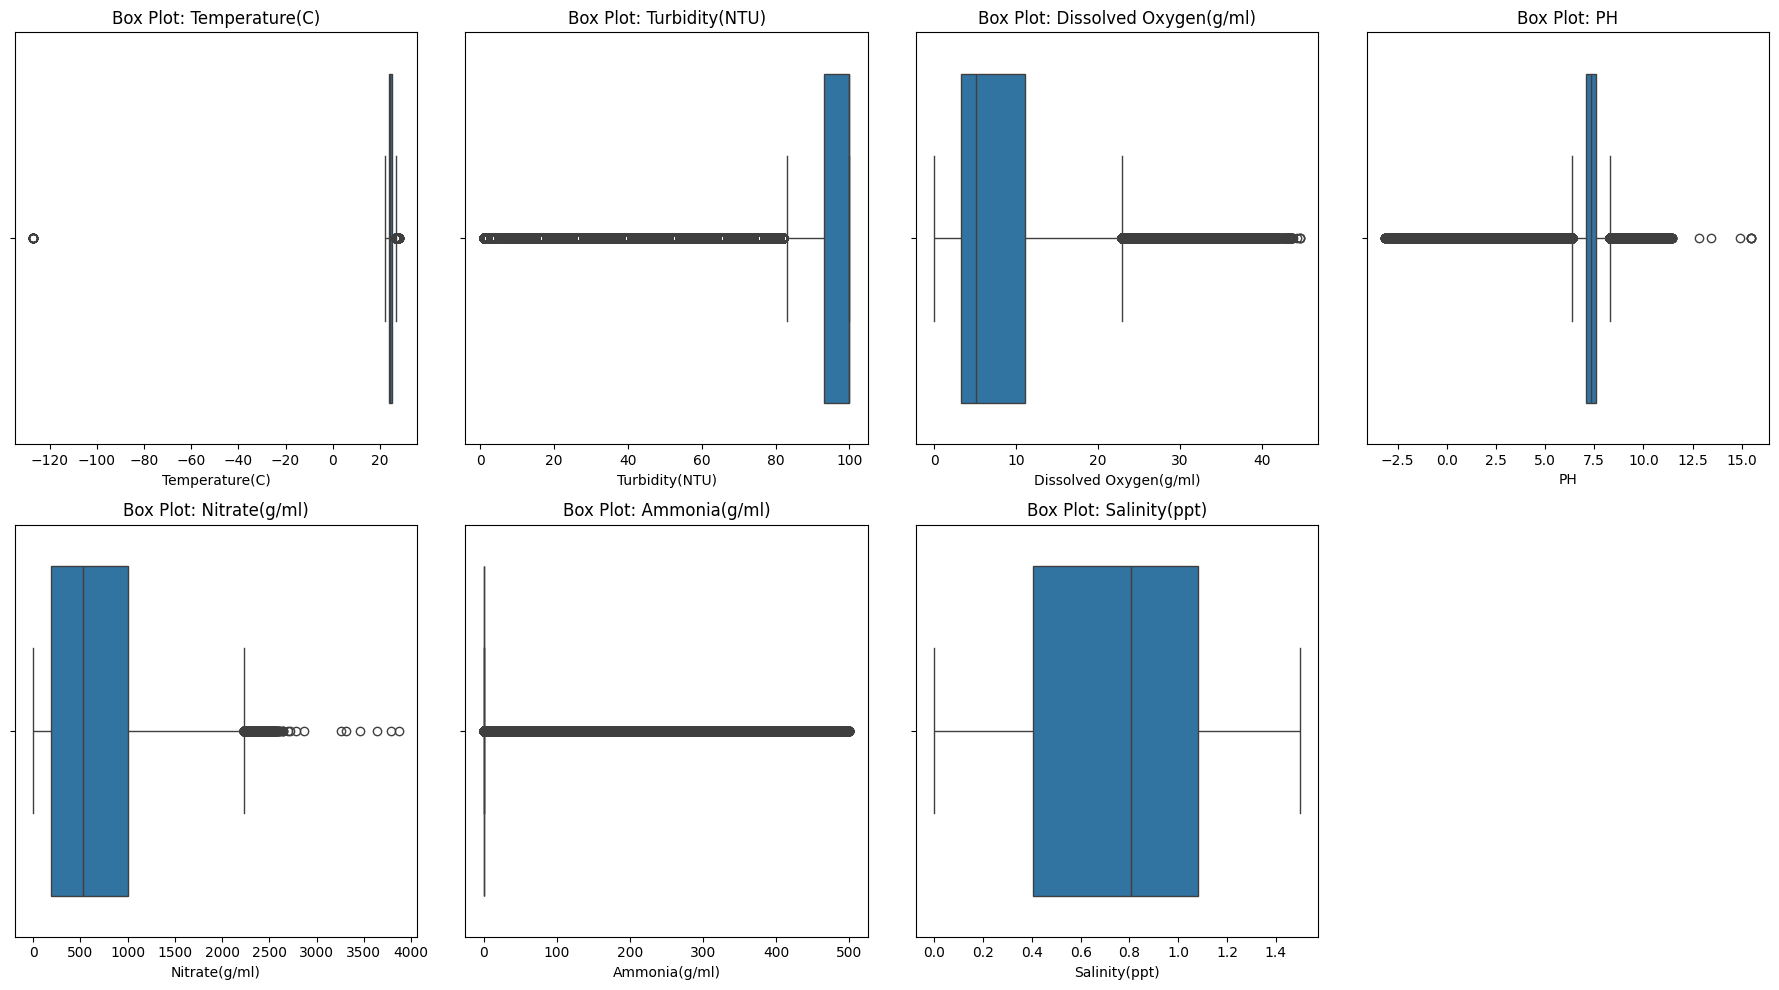

In [ ]:
# Set up a 2x4 grid for subplots (2 rows, 4 columns)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))

# Features to visualize
features = ['Temperature(C)', 'Turbidity(NTU)', 'Dissolved Oxygen(g/ml)', 'PH', 'Nitrate(g/ml)', 'Ammonia(g/ml)', 'Salinity(ppt)']

# Box plots
for i, feature in enumerate(features):
    # Additional check for NaN values and data type
    if feature in data.columns and pd.api.types.is_numeric_dtype(data[feature]):
        sns.boxplot(x=data[feature], ax=axes[i//4, i%4])
        axes[i//4, i%4].set_title(f'Box Plot: {feature}')
    else:
        print(f"Skipping {feature} due to missing or non-numeric data.")

# Adjust layout
plt.tight_layout()

# Remove the last subplot in the second row
fig.delaxes(axes[1, -1])

# Show the plots
plt.show()

**Histograms**

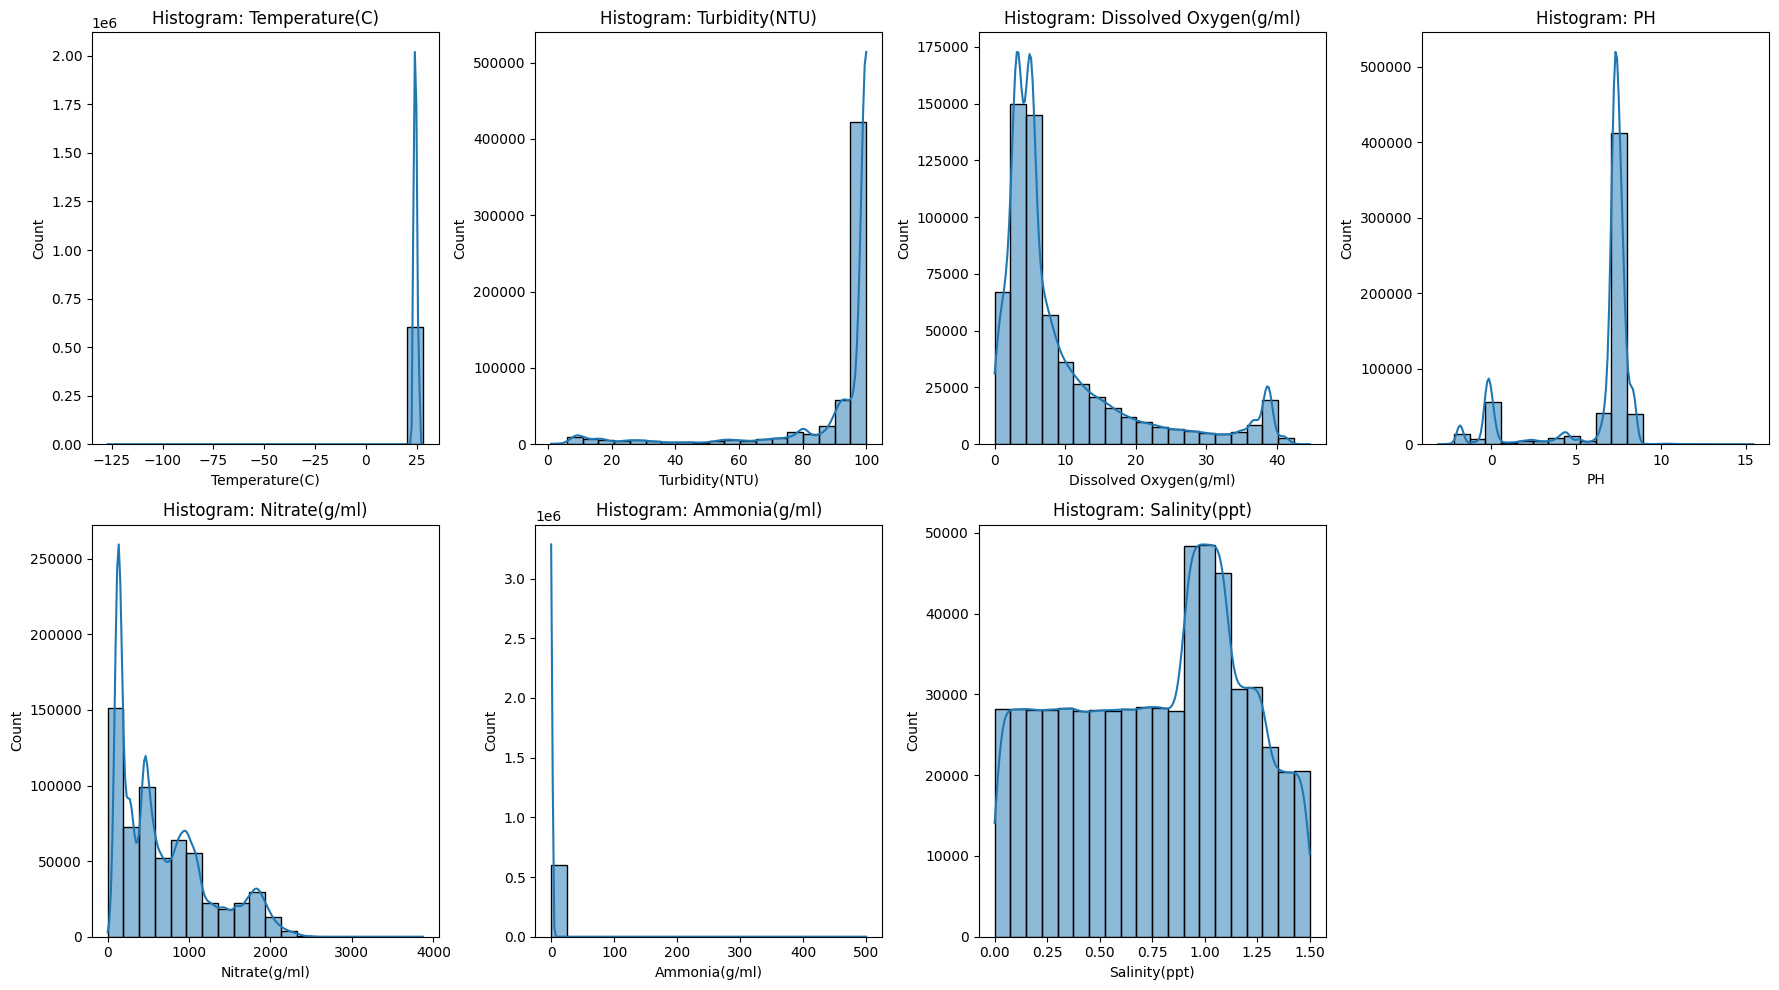

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a 2x4 grid for subplots (2 rows, 4 columns)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))

# Features to visualize
features = ['Temperature(C)', 'Turbidity(NTU)', 'Dissolved Oxygen(g/ml)', 'PH', 'Nitrate(g/ml)', 'Ammonia(g/ml)', 'Salinity(ppt)']

# Histograms
for i, feature in enumerate(features):
    sns.histplot(data[feature], kde=True, ax=axes[i//4, i%4], bins=20)
    axes[i//4, i%4].set_title(f'Histogram: {feature}')

# Adjust layout
plt.tight_layout()

# Remove the last subplot in the second row
fig.delaxes(axes[1, -1])

# Show the plots
plt.show()

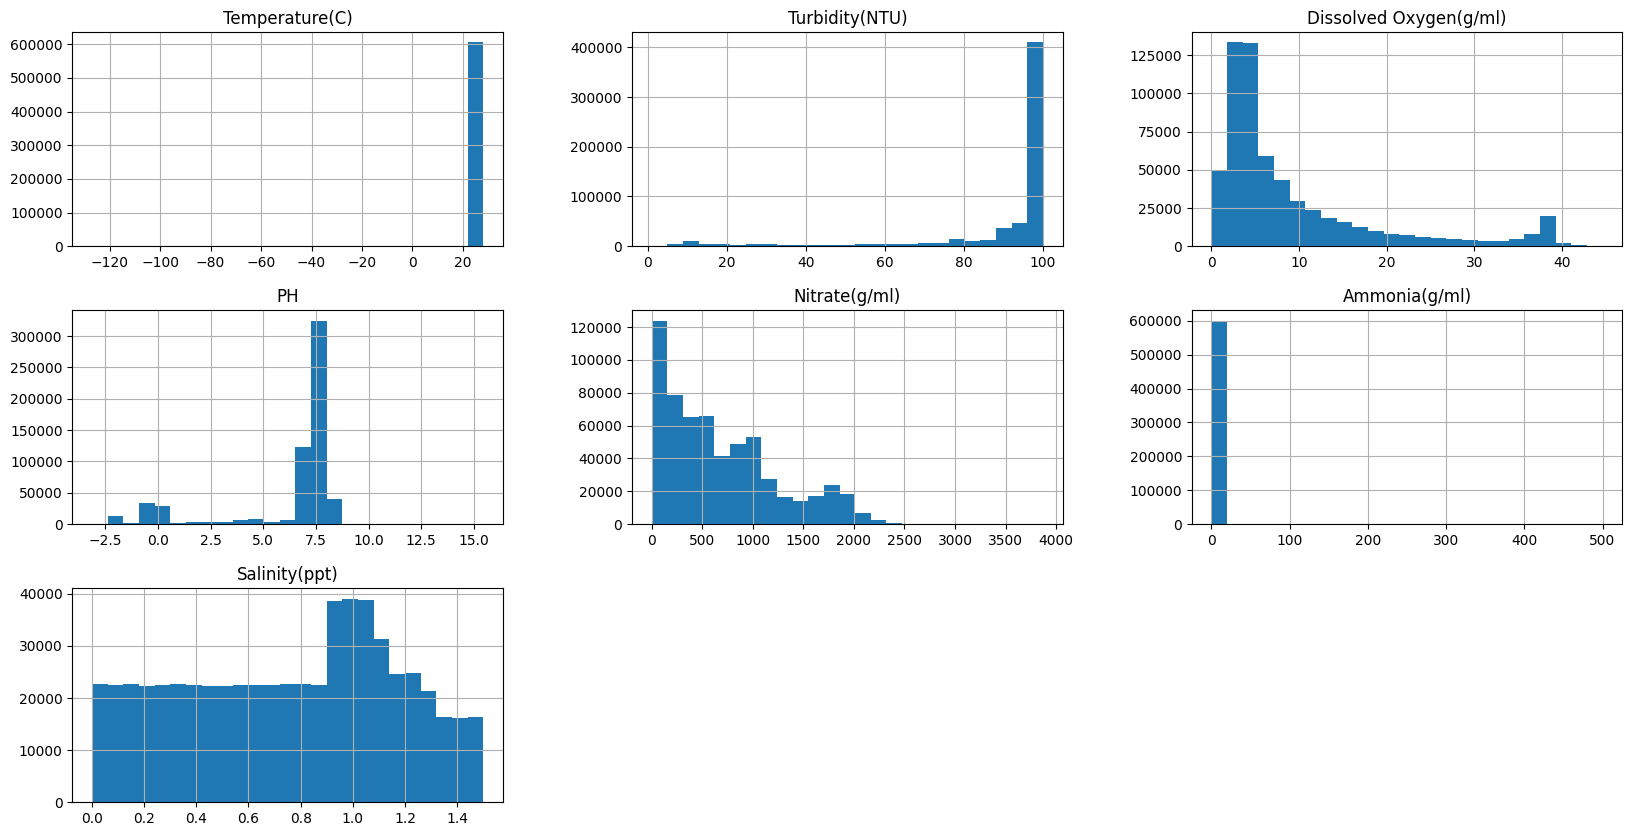

In [ ]:
# Histograms to visualize the distribution of each feature to identify potential outliers
data.hist(figsize=(20, 10), bins=25)
plt.show()

In [ ]:
from scipy import stats

columns_of_interest = ['Nitrate(g/ml)', 'Ammonia(g/ml)']

# Calculate Z scores for the specified columns
z_scores_nitrate = np.abs(stats.zscore(data['Nitrate(g/ml)']))
z_scores_ammonia = np.abs(stats.zscore(data['Ammonia(g/ml)']))

# Define thresholds
lower_threshold = -2.5
upper_threshold = 2.5

# Identify records with Z scores below -3 or above 3 for Nitrate
outliers_mask_nitrate_below = z_scores_nitrate <= lower_threshold
outliers_mask_nitrate_above = z_scores_nitrate >= upper_threshold

# Identify records with Z scores below -3 or above 3 for Ammonia
outliers_mask_ammonia_below = z_scores_ammonia <= lower_threshold
outliers_mask_ammonia_above = z_scores_ammonia >= upper_threshold

# Count the number of records with Z scores in the specified range for each column
num_outliers_nitrate_below = outliers_mask_nitrate_below.sum()
num_outliers_nitrate_above = outliers_mask_nitrate_above.sum()
num_outliers_ammonia_below = outliers_mask_ammonia_below.sum()
num_outliers_ammonia_above = outliers_mask_ammonia_above.sum()

print(f"Number of records with Z scores below -2.5 for Nitrate: {num_outliers_nitrate_below}")
print(f"Number of records with Z scores above 2.5 for Nitrate: {num_outliers_nitrate_above}")
print(f"Number of records with Z scores below -2.5 for Ammonia: {num_outliers_ammonia_below}")
print(f"Number of records with Z scores above 2.5 for Ammonia: {num_outliers_ammonia_above}")

Number of records with Z scores below -2.5 for Nitrate: 0
Number of records with Z scores above 2.5 for Nitrate: 6821
Number of records with Z scores below -2.5 for Ammonia: 0
Number of records with Z scores above 2.5 for Ammonia: 4284


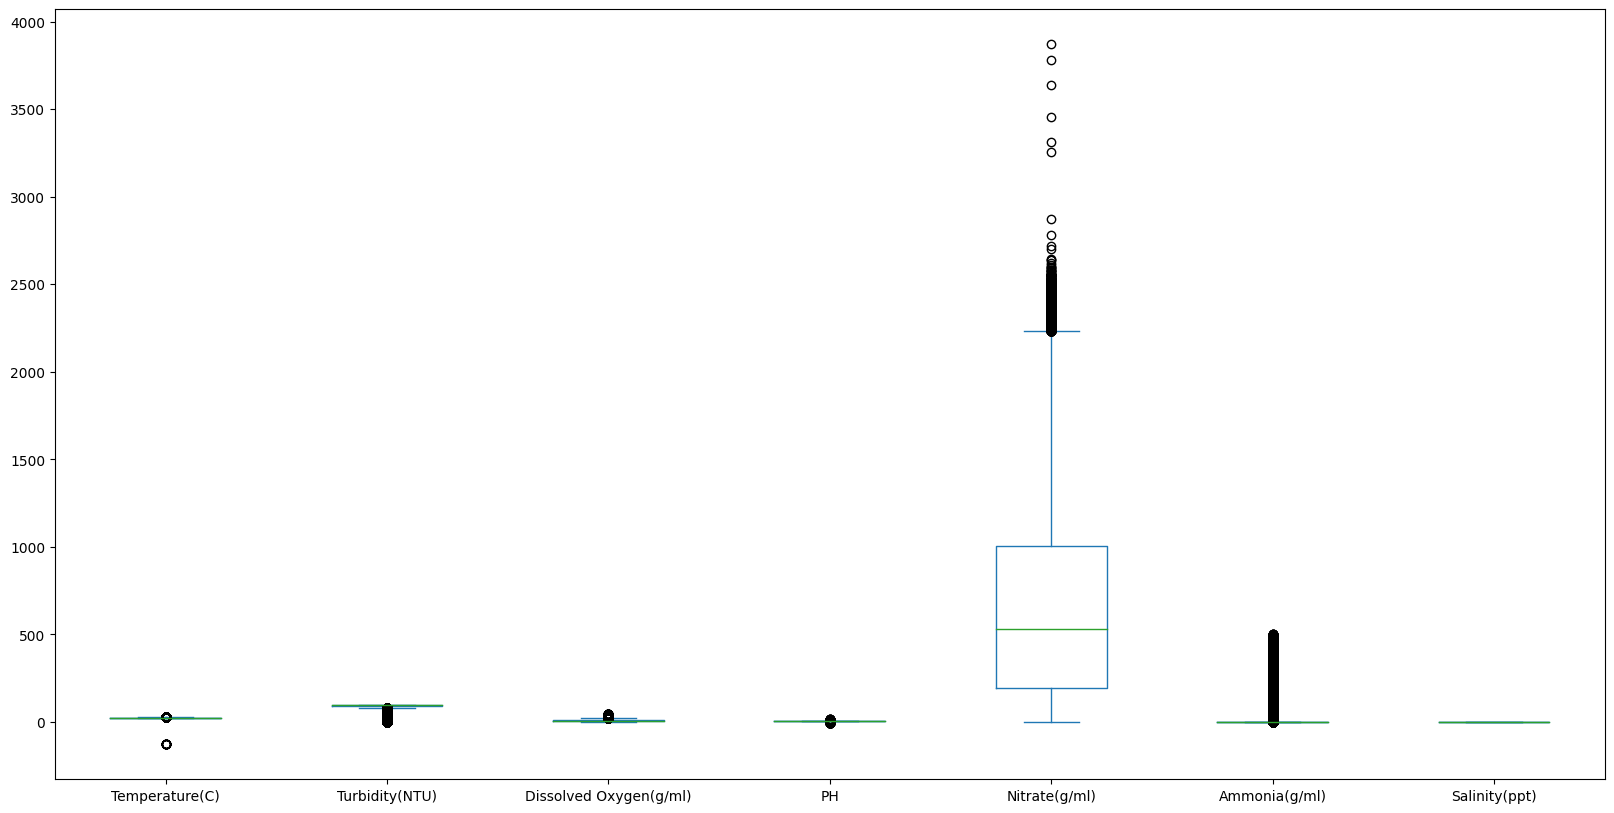

In [ ]:
#generates a box plot for each numerical column
data.plot(kind='box', figsize=(20, 10))
plt.show()

In [ ]:
#Detect and Remove Outliers
mean = np.mean(data['Ammonia(g/ml)'])
mean

2.0807772518651655

In [ ]:
std = np.std(data['Ammonia(g/ml)'])
std

26.143378463815765

In [ ]:
(data['Ammonia(g/ml)']-mean)/std

0        -0.078776
1        -0.078511
2        -0.078598
3        -0.078751
4        -0.078654
            ...   
605417   -0.078715
605418   -0.078695
605453   -0.078776
605454   -0.078511
605455   -0.078598
Name: Ammonia(g/ml), Length: 605373, dtype: float64

In [ ]:
data['Ammonia(g/ml)_z_score'] = (data['Ammonia(g/ml)'] - mean)/std
data.head(5)

Temperature(C)  Turbidity(NTU)  Dissolved Oxygen(g/ml)       PH  \
0         24.8750           100.0                   4.505  8.43365   
1         24.9375           100.0                   6.601  8.43818   
2         24.8750           100.0                  15.797  8.42457   
3         24.9375           100.0                   5.046  8.43365   
4         24.9375           100.0                  38.407  8.40641   

   Nitrate(g/ml)  Ammonia(g/ml)     Fish Diseases  Salinity(ppt)  \
0          193.0       0.021316  White Spot (Ich)       0.819644   
1          194.0       0.028238  White Spot (Ich)       0.732725   
2          192.0       0.025959  White Spot (Ich)       0.867593   
3          193.0       0.021967  White Spot (Ich)       1.069370   
4          192.0       0.024505  White Spot (Ich)       0.901826   

   Ammonia(g/ml)_z_score  
0              -0.078776  
1              -0.078511  
2              -0.078598  
3              -0.078751  
4              -0.078654

In [ ]:
data[data['Ammonia(g/ml)_z_score']>2.5]

Temperature(C)  Turbidity(NTU)  Dissolved Oxygen(g/ml)       PH  \
160            24.7500           100.0                  21.308  8.42911   
688            24.4375           100.0                   4.234  8.43365   
727            24.3750           100.0                   6.465  8.41549   
744            24.5000           100.0                   2.315  8.42457   
911            24.3750           100.0                  15.670  8.42457   
...                ...             ...                     ...      ...   
605064         26.2500           100.0                   0.342  2.14649   
605206         26.9375           100.0                   5.947  6.00049   
605344         27.3125           100.0                   0.470  2.69122   
605371         27.1250           100.0                   1.056  2.29175   
605391         27.0000           100.0                   0.824  2.16918   

        Nitrate(g/ml)  Ammonia(g/ml)     Fish Diseases  Salinity(ppt)  \
160             192.0     464.290240  White Spot (Ich)       1.066858   
688             193.0     211.645017  White Spot (Ich)       0.281074   
727             191.0     240.721836           Fin Rot       1.344001   
744             192.0     382.790350  White Spot (Ich)       0.617782   
911             198.0     251.203872           Fin Rot       1.173677   
...               ...            ...               ...            ...   
605064         2151.0     118.511450           Fin Rot       1.166751   
605206         1810.0     255.883532           Fin Rot       0.909743   
605344         2078.0     321.150252           Fin Rot       1.186904   
605371         1970.0     168.128180           Fin Rot       1.283712   
605391         1785.0     281.176350           Fin Rot       1.391621   

        Ammonia(g/ml)_z_score  
160                 17.679791  
688                  8.015959  
727                  9.128164  
744                 14.562371  
911                  9.529109  
...                       ...  
605064               4.453543  
605206               9.708108  
605344              12.204600  
605371               6.351413  
605391              10.675574  

[4284 rows x 9 columns]

In [ ]:
data[data['Ammonia(g/ml)_z_score']<-2.5]

Empty DataFrame
Columns: [Temperature(C), Turbidity(NTU), Dissolved Oxygen(g/ml), PH, Nitrate(g/ml), Ammonia(g/ml), Fish Diseases, Salinity(ppt), Ammonia(g/ml)_z_score]
Index: []

In [ ]:
data['Ammonia(g/ml)_z_score'].min

<bound method NDFrame._add_numeric_operations.<locals>.min of 0        -0.078776
1        -0.078511
2        -0.078598
3        -0.078751
4        -0.078654
            ...   
605417   -0.078715
605418   -0.078695
605453   -0.078776
605454   -0.078511
605455   -0.078598
Name: Ammonia(g/ml)_z_score, Length: 605373, dtype: float64>

In [ ]:
#Remove Outliers
outlier_indexes = []
outlier_indexes.extend(data.index[data['Ammonia(g/ml)_z_score']>2.5].tolist())
outlier_indexes.extend(data.index[data['Ammonia(g/ml)_z_score']<-2.5].tolist())
outlier_indexes

[160,
 688,
 727,
 744,
 911,
 1286,
 1312,
 1351,
 1407,
 1466,
 1519,
 1999,
 2027,
 2028,
 2113,
 2202,
 2241,
 2274,
 2277,
 2412,
 2656,
 2716,
 2830,
 3098,
 3374,
 3452,
 3981,
 4338,
 4503,
 4529,
 4563,
 4649,
 4691,
 4780,
 4896,
 4973,
 5234,
 5295,
 5392,
 5454,
 5477,
 5641,
 5696,
 5789,
 6214,
 6681,
 7179,
 7283,
 7292,
 7487,
 7603,
 7705,
 7845,
 7923,
 7933,
 8002,
 8123,
 8222,
 8406,
 8630,
 8670,
 8693,
 8737,
 8920,
 9090,
 9103,
 9287,
 9461,
 9466,
 9491,
 9595,
 9799,
 9842,
 9935,
 9940,
 10127,
 10158,
 10299,
 10698,
 10887,
 10888,
 10903,
 10942,
 11107,
 11209,
 11475,
 11521,
 11582,
 11656,
 11965,
 12015,
 12035,
 12169,
 12264,
 12674,
 12757,
 12932,
 13131,
 13248,
 13270,
 13765,
 13858,
 13912,
 13933,
 14104,
 14134,
 14153,
 14326,
 14361,
 14571,
 14580,
 14587,
 14699,
 14752,
 15268,
 15315,
 15368,
 15477,
 15620,
 15799,
 15841,
 15980,
 15993,
 16012,
 16361,
 16531,
 16658,
 16703,
 16718,
 16730,
 16741,
 17088,
 17098,
 17140,
 17232,


In [ ]:
data = data.drop(outlier_indexes, errors='ignore')
data.shape

(601089, 9)

We're filtering out outliers in the 'Ammonia(g/ml)' column with z scores beyond -2.5 and 2.5 for a more robust dataset.

In [ ]:
mean = np.mean(data['Nitrate(g/ml)'])
mean

696.2219504931882

In [ ]:
std = np.std(data['Nitrate(g/ml)'])
std

553.8882148214724

In [ ]:
(data['Nitrate(g/ml)']-mean)/std

0        -0.908526
1        -0.906721
2        -0.910332
3        -0.908526
4        -0.910332
            ...   
605417    1.924175
605418    1.904316
605453   -0.908526
605454   -0.906721
605455   -0.910332
Name: Nitrate(g/ml), Length: 601089, dtype: float64

In [ ]:
data['Nitrate(g/ml)_z_score'] = (data['Nitrate(g/ml)'] - mean)/std
data.head(5)

Temperature(C)  Turbidity(NTU)  Dissolved Oxygen(g/ml)       PH  \
0         24.8750           100.0                   4.505  8.43365   
1         24.9375           100.0                   6.601  8.43818   
2         24.8750           100.0                  15.797  8.42457   
3         24.9375           100.0                   5.046  8.43365   
4         24.9375           100.0                  38.407  8.40641   

   Nitrate(g/ml)  Ammonia(g/ml)     Fish Diseases  Salinity(ppt)  \
0          193.0       0.021316  White Spot (Ich)       0.819644   
1          194.0       0.028238  White Spot (Ich)       0.732725   
2          192.0       0.025959  White Spot (Ich)       0.867593   
3          193.0       0.021967  White Spot (Ich)       1.069370   
4          192.0       0.024505  White Spot (Ich)       0.901826   

   Ammonia(g/ml)_z_score  Nitrate(g/ml)_z_score  
0              -0.078776              -0.908526  
1              -0.078511              -0.906721  
2              -0.078598              -0.910332  
3              -0.078751              -0.908526  
4              -0.078654              -0.910332

In [ ]:
data[data['Nitrate(g/ml)_z_score']>2.5]

Temperature(C)  Turbidity(NTU)  Dissolved Oxygen(g/ml)       PH  \
243210         25.5000            70.0                  25.815 -1.74837   
254254         26.5625            74.0                  20.080 -1.79377   
424532         25.0000           100.0                   5.080  4.77030   
424533         25.3750           100.0                   5.080  2.01484   
424534         25.2500           100.0                   5.080  1.58813   
...                ...             ...                     ...      ...   
605349         27.3125           100.0                   1.468  2.53688   
605350         27.3125           100.0                   4.819  2.54596   
605351         27.3125           100.0                   1.497  2.51418   
605359         27.2500           100.0                   0.072  2.41885   
605378         27.1250           100.0                   5.217  2.24636   

        Nitrate(g/ml)  Ammonia(g/ml)     Fish Diseases  Salinity(ppt)  \
243210         2151.0       0.026762  White Spot (Ich)       1.102524   
254254         2224.0       0.024784           Fin Rot       1.306008   
424532         3640.0       0.025443  White Spot (Ich)       0.053892   
424533         3870.0       0.026951  White Spot (Ich)       0.682153   
424534         3783.0       0.032201  White Spot (Ich)       0.239067   
...               ...            ...               ...            ...   
605349         2157.0       0.027675           Fin Rot       1.181602   
605350         2174.0       0.026899           Fin Rot       1.075481   
605351         2107.0       0.024367           Fin Rot       1.002089   
605359         2133.0       0.022811           Fin Rot       1.187812   
605378         2083.0       0.027124           Fin Rot       1.155722   

        Ammonia(g/ml)_z_score  Nitrate(g/ml)_z_score  
243210              -0.078567               2.626483  
254254              -0.078643               2.758279  
424532              -0.078618               5.314751  
424533              -0.078560               5.729997  
424534              -0.078359               5.572926  
...                       ...                    ...  
605349              -0.078532               2.637316  
605350              -0.078562               2.668008  
605351              -0.078659               2.547045  
605359              -0.078718               2.593986  
605378              -0.078553               2.503715  

[6772 rows x 10 columns]

In [ ]:
data[data['Nitrate(g/ml)_z_score']<-2.5]

Empty DataFrame
Columns: [Temperature(C), Turbidity(NTU), Dissolved Oxygen(g/ml), PH, Nitrate(g/ml), Ammonia(g/ml), Fish Diseases, Salinity(ppt), Ammonia(g/ml)_z_score, Nitrate(g/ml)_z_score]
Index: []

In [ ]:
data['Nitrate(g/ml)_z_score'].min

<bound method NDFrame._add_numeric_operations.<locals>.min of 0        -0.908526
1        -0.906721
2        -0.910332
3        -0.908526
4        -0.910332
            ...   
605417    1.924175
605418    1.904316
605453   -0.908526
605454   -0.906721
605455   -0.910332
Name: Nitrate(g/ml)_z_score, Length: 601089, dtype: float64>

In [ ]:
#Remove Outliers
outlier_indexes1 = []
outlier_indexes1.extend(data.index[data['Nitrate(g/ml)_z_score']>2.5].tolist())
outlier_indexes1.extend(data.index[data['Nitrate(g/ml)_z_score']<-2.5].tolist())
outlier_indexes1

[243210,
 254254,
 424532,
 424533,
 424534,
 424535,
 482200,
 482316,
 482318,
 482319,
 482320,
 482321,
 482322,
 482323,
 482324,
 482326,
 482327,
 482328,
 482329,
 482330,
 482331,
 482332,
 482333,
 482334,
 482335,
 482336,
 482337,
 482338,
 482339,
 482340,
 482341,
 482342,
 482343,
 482344,
 482345,
 482346,
 482347,
 482348,
 482349,
 482350,
 482351,
 482352,
 482355,
 482372,
 482373,
 482374,
 482375,
 482377,
 482378,
 482379,
 482380,
 482381,
 482382,
 482383,
 482384,
 482385,
 482386,
 482387,
 482388,
 482389,
 482390,
 482391,
 482392,
 482393,
 482394,
 482395,
 482396,
 482397,
 482398,
 482399,
 482400,
 482401,
 482402,
 482403,
 482404,
 482405,
 482406,
 482407,
 482408,
 482409,
 482410,
 482411,
 482412,
 482413,
 482414,
 482415,
 482416,
 482417,
 482418,
 482419,
 482420,
 482421,
 482423,
 482424,
 482425,
 482426,
 482427,
 482428,
 482431,
 482433,
 483028,
 483043,
 483044,
 483045,
 483046,
 483047,
 483048,
 483049,
 483050,
 483051,
 483053,
 

In [ ]:
data = data.drop(outlier_indexes1, errors='ignore')
data.shape

(594317, 10)

In [ ]:
data.tail(10)

Temperature(C)  Turbidity(NTU)  Dissolved Oxygen(g/ml)       PH  \
605412         26.8125           100.0                   5.650  2.01938   
605413         26.7500           100.0                   1.576  2.02392   
605414         26.7500           100.0                   1.355  2.01938   
605415         26.6250           100.0                   0.654  1.96945   
605416         26.6875           100.0                   1.873  2.13741   
605417         26.6250           100.0                   0.449  2.01484   
605418         26.6250           100.0                  13.158  1.97399   
605453         24.8750           100.0                   4.505  8.43365   
605454         24.9375           100.0                   6.601  8.43818   
605455         24.8750           100.0                  15.797  8.42457   

        Nitrate(g/ml)  Ammonia(g/ml)     Fish Diseases  Salinity(ppt)  \
605412         1787.0       0.029867           Fin Rot       0.917330   
605413         1711.0       0.025737           Fin Rot       1.488922   
605414         1827.0       0.028004           Fin Rot       1.161433   
605415         1747.0       0.024553           Fin Rot       1.103161   
605416         1712.0       0.023856           Fin Rot       1.189175   
605417         1762.0       0.022909           Fin Rot       1.362110   
605418         1751.0       0.023431           Fin Rot       0.940363   
605453          193.0       0.021316  White Spot (Ich)       0.833365   
605454          194.0       0.028238  White Spot (Ich)       0.729428   
605455          192.0       0.025959  White Spot (Ich)       0.052746   

        Ammonia(g/ml)_z_score  Nitrate(g/ml)_z_score  
605412              -0.078449               1.969311  
605413              -0.078607               1.832099  
605414              -0.078520               2.041528  
605415              -0.078652               1.897094  
605416              -0.078678               1.833904  
605417              -0.078715               1.924175  
605418              -0.078695               1.904316  
605453              -0.078776              -0.908526  
605454              -0.078511              -0.906721  
605455              -0.078598              -0.910332

In [ ]:
columns_to_drop = ['Ammonia(g/ml)_z_score', 'Nitrate(g/ml)_z_score']
data = data.drop(columns=columns_to_drop)
data.shape

(594317, 8)

In [ ]:
data.describe()

Temperature(C)  Turbidity(NTU)  Dissolved Oxygen(g/ml)             PH  \
count   594317.000000   594317.000000           594317.000000  594317.000000   
mean        24.475436       90.185218                9.344507       6.266613   
std          1.208465       21.504365                9.640857       2.752714   
min       -127.000000        1.000000                0.007000      -3.137450   
25%         23.812500       93.000000                3.200000       7.094500   
50%         24.375000      100.000000                5.080000       7.316940   
75%         25.062500      100.000000               11.216000       7.575690   
max         28.062500      100.000000               44.635000      15.451660   

       Nitrate(g/ml)  Ammonia(g/ml)  Salinity(ppt)  
count  594317.000000  594317.000000   5.943170e+05  
mean      679.030117       0.063764   7.562442e-01  
std       532.843146       1.307247   4.102710e-01  
min         0.000000       0.013480   3.710000e-08  
25%       192.000000       0.023312   4.026755e-01  
50%       525.000000       0.024998   8.056460e-01  
75%       995.000000       0.026689   1.079603e+00  
max      2080.000000      67.386091   1.499999e+00

We're filtering out outliers in the 'Nitrate(g/ml)' column with z scores beyond -2.5 and 2.5 for a more robust dataset.

#  **Exploratory Data Analysis (EDA):**

**Categorical Feature Analysis**

In [ ]:
# retrieves the count of unique values in the 'Fish Diseases' column
data['Fish Diseases'].value_counts()

White Spot (Ich)    253972
Red Spot            181129
Fin Rot             159216
Name: Fish Diseases, dtype: int64

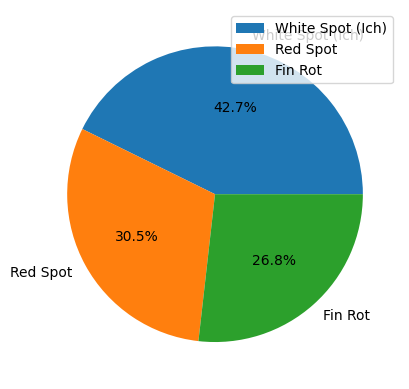

In [ ]:
# creates a pie chart to show the proportion of unique values in the 'Fish Diseases' column
plt.pie(data['Fish Diseases'].value_counts(),autopct="%1.1f%%",labels=['White Spot (Ich)','Red Spot','Fin Rot'])
plt.legend()

<ipython-input-56-062abcc1aee6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fish Diseases', data=data, palette='Set1')


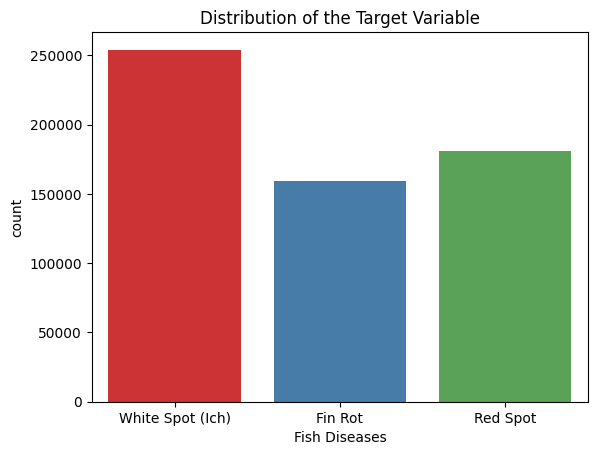

In [ ]:
sns.countplot(x='Fish Diseases', data=data, palette='Set1')
plt.title('Distribution of the Target Variable')
plt.show()

 **Numerical Features vs. Target:**

## 1) PH

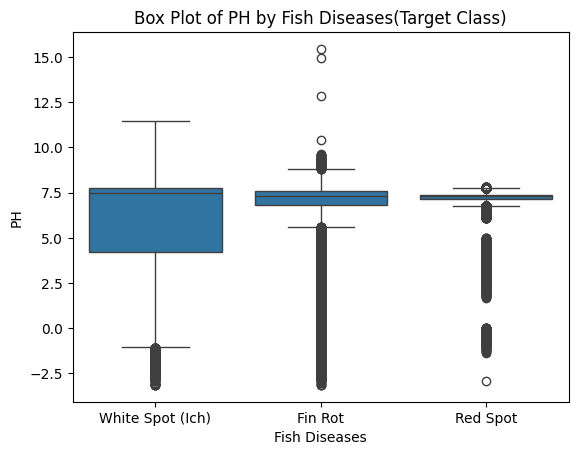

In [ ]:
sns.boxplot(x='Fish Diseases', y='PH', data=data)
plt.title('Box Plot of PH by Fish Diseases(Target Class)')
plt.show()

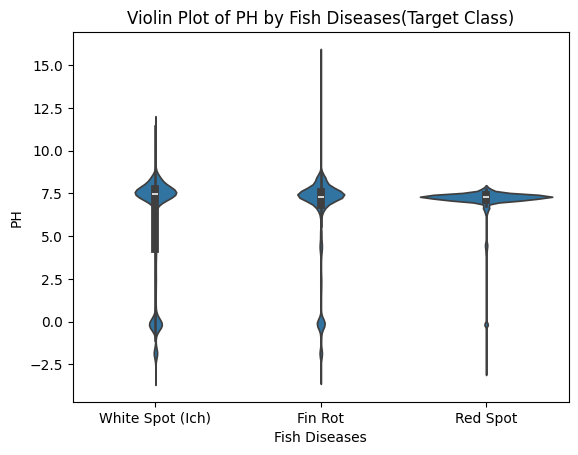

In [ ]:
sns.violinplot(x='Fish Diseases', y='PH', data=data)
plt.title('Violin Plot of PH by Fish Diseases(Target Class)')
plt.show()

# 2) Temperature(C)

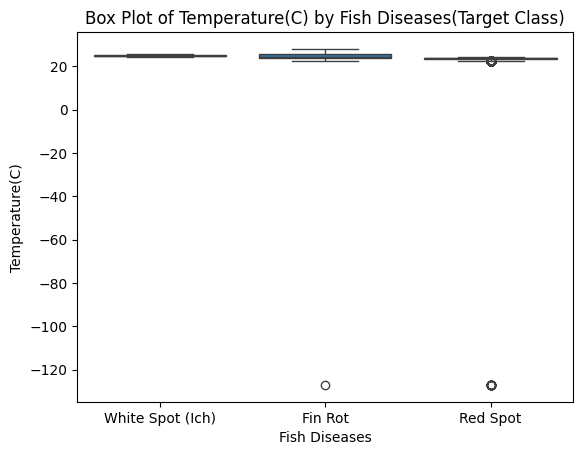

In [ ]:
sns.boxplot(x='Fish Diseases', y='Temperature(C)', data=data)
plt.title('Box Plot of Temperature(C) by Fish Diseases(Target Class)')
plt.show()

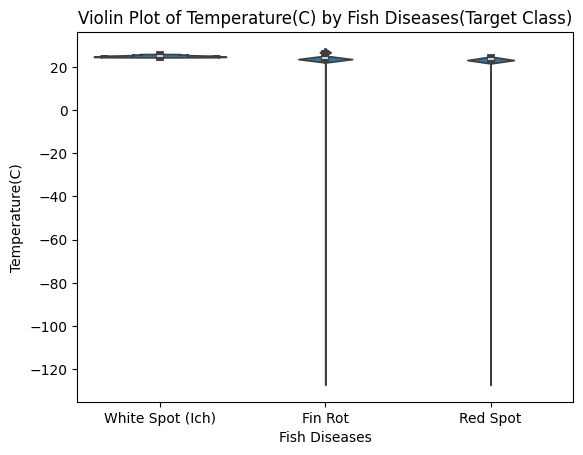

In [ ]:
sns.violinplot(x='Fish Diseases', y='Temperature(C)', data=data)
plt.title('Violin Plot of Temperature(C) by Fish Diseases(Target Class)')
plt.show()

# 3) Turbidity(NTU)

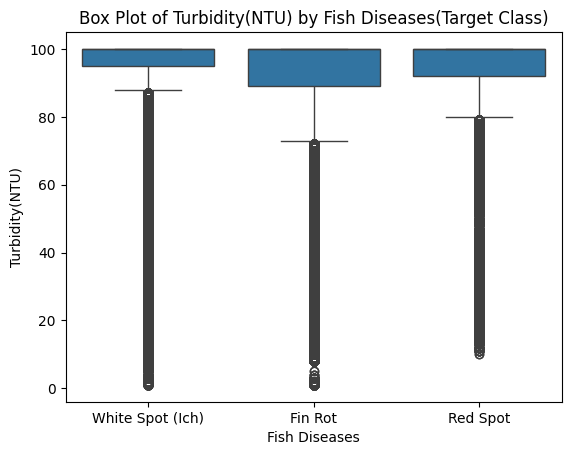

In [ ]:
sns.boxplot(x='Fish Diseases', y='Turbidity(NTU)', data=data)
plt.title('Box Plot of Turbidity(NTU) by Fish Diseases(Target Class)')
plt.show()

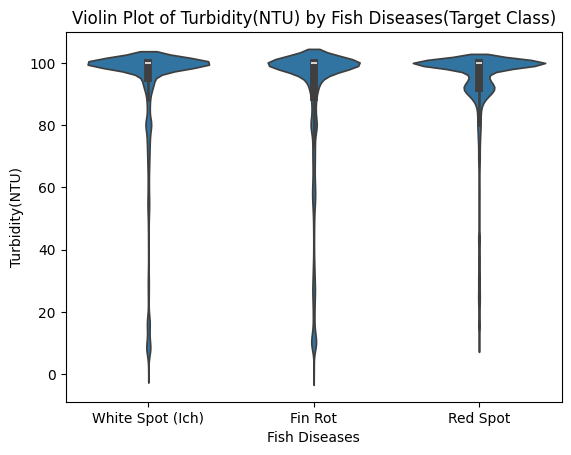

In [ ]:
sns.violinplot(x='Fish Diseases', y='Turbidity(NTU)', data=data)
plt.title('Violin Plot of Turbidity(NTU) by Fish Diseases(Target Class)')
plt.show()

# 4) Dissolved Oxygen(g/ml)

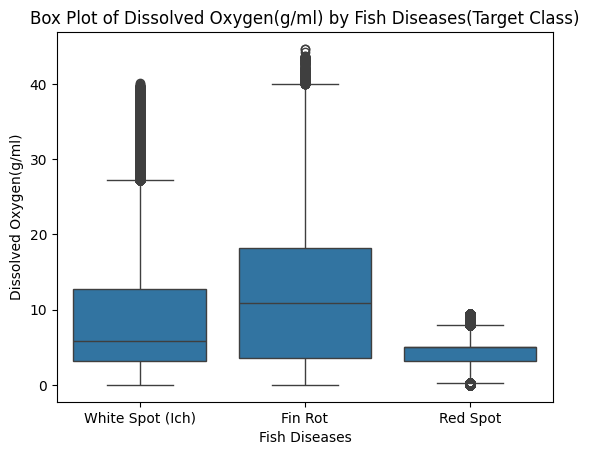

In [ ]:
sns.boxplot(x='Fish Diseases', y='Dissolved Oxygen(g/ml)', data=data)
plt.title('Box Plot of Dissolved Oxygen(g/ml) by Fish Diseases(Target Class)')
plt.show()

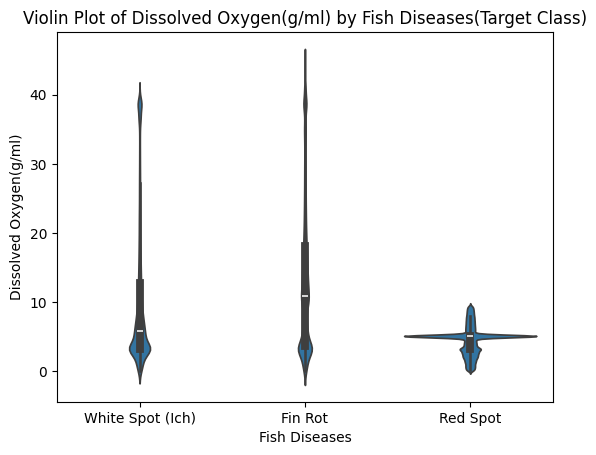

In [ ]:
sns.violinplot(x='Fish Diseases', y='Dissolved Oxygen(g/ml)', data=data)
plt.title('Violin Plot of Dissolved Oxygen(g/ml) by Fish Diseases(Target Class)')
plt.show()

# 5) Nitrate(g/ml)

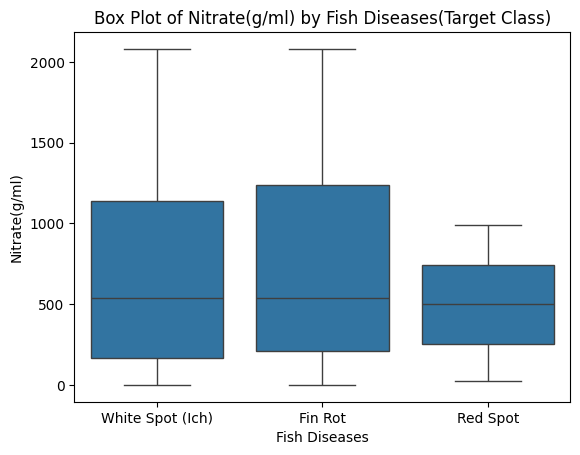

In [ ]:
sns.boxplot(x='Fish Diseases', y='Nitrate(g/ml)', data=data)
plt.title('Box Plot of Nitrate(g/ml) by Fish Diseases(Target Class)')
plt.show()

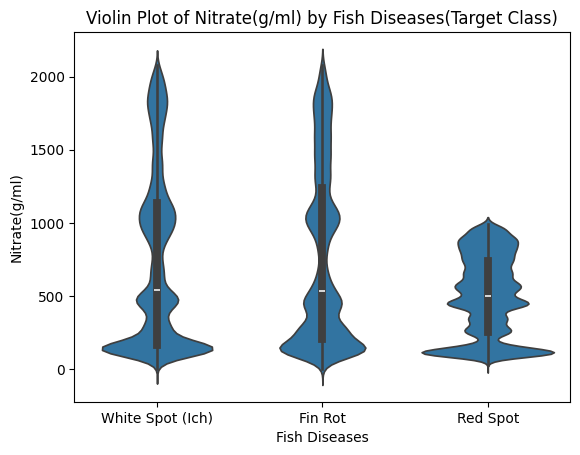

In [ ]:
sns.violinplot(x='Fish Diseases', y='Nitrate(g/ml)', data=data)
plt.title('Violin Plot of Nitrate(g/ml) by Fish Diseases(Target Class)')
plt.show()

# 6) Ammonia(g/ml)

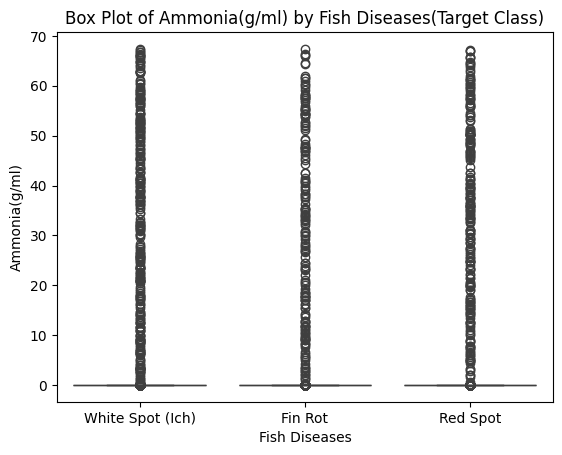

In [ ]:
sns.boxplot(x='Fish Diseases', y='Ammonia(g/ml)', data=data)
plt.title('Box Plot of Ammonia(g/ml) by Fish Diseases(Target Class)')
plt.show()

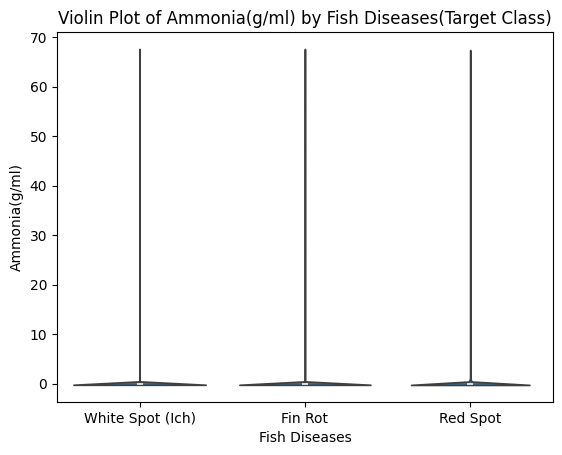

In [ ]:
sns.violinplot(x='Fish Diseases', y='Ammonia(g/ml)', data=data)
plt.title('Violin Plot of Ammonia(g/ml) by Fish Diseases(Target Class)')
plt.show()

# 7) Salinity

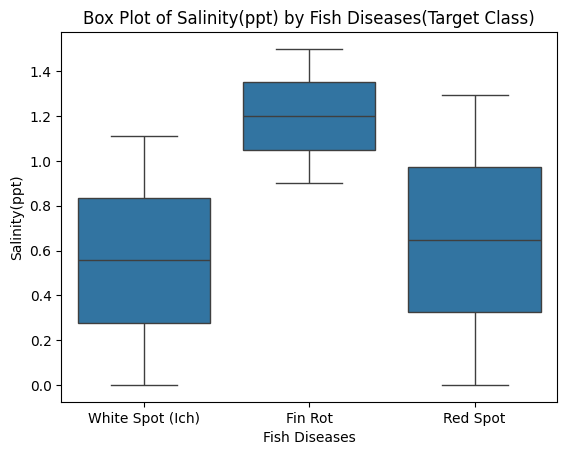

In [ ]:
sns.boxplot(x='Fish Diseases', y='Salinity(ppt)', data=data)
plt.title('Box Plot of Salinity(ppt) by Fish Diseases(Target Class)')
plt.show()

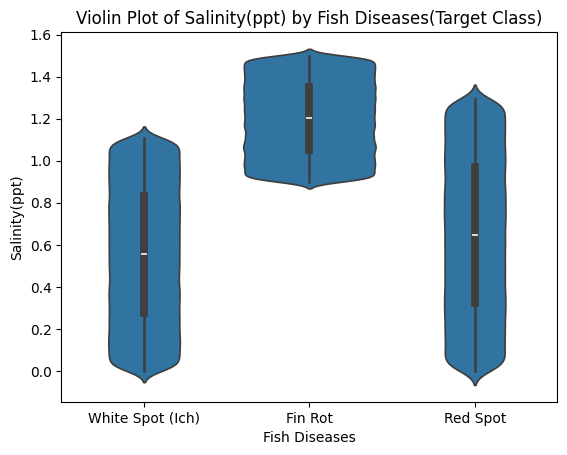

In [ ]:
sns.violinplot(x='Fish Diseases', y='Salinity(ppt)', data=data)
plt.title('Violin Plot of Salinity(ppt) by Fish Diseases(Target Class)')
plt.show()

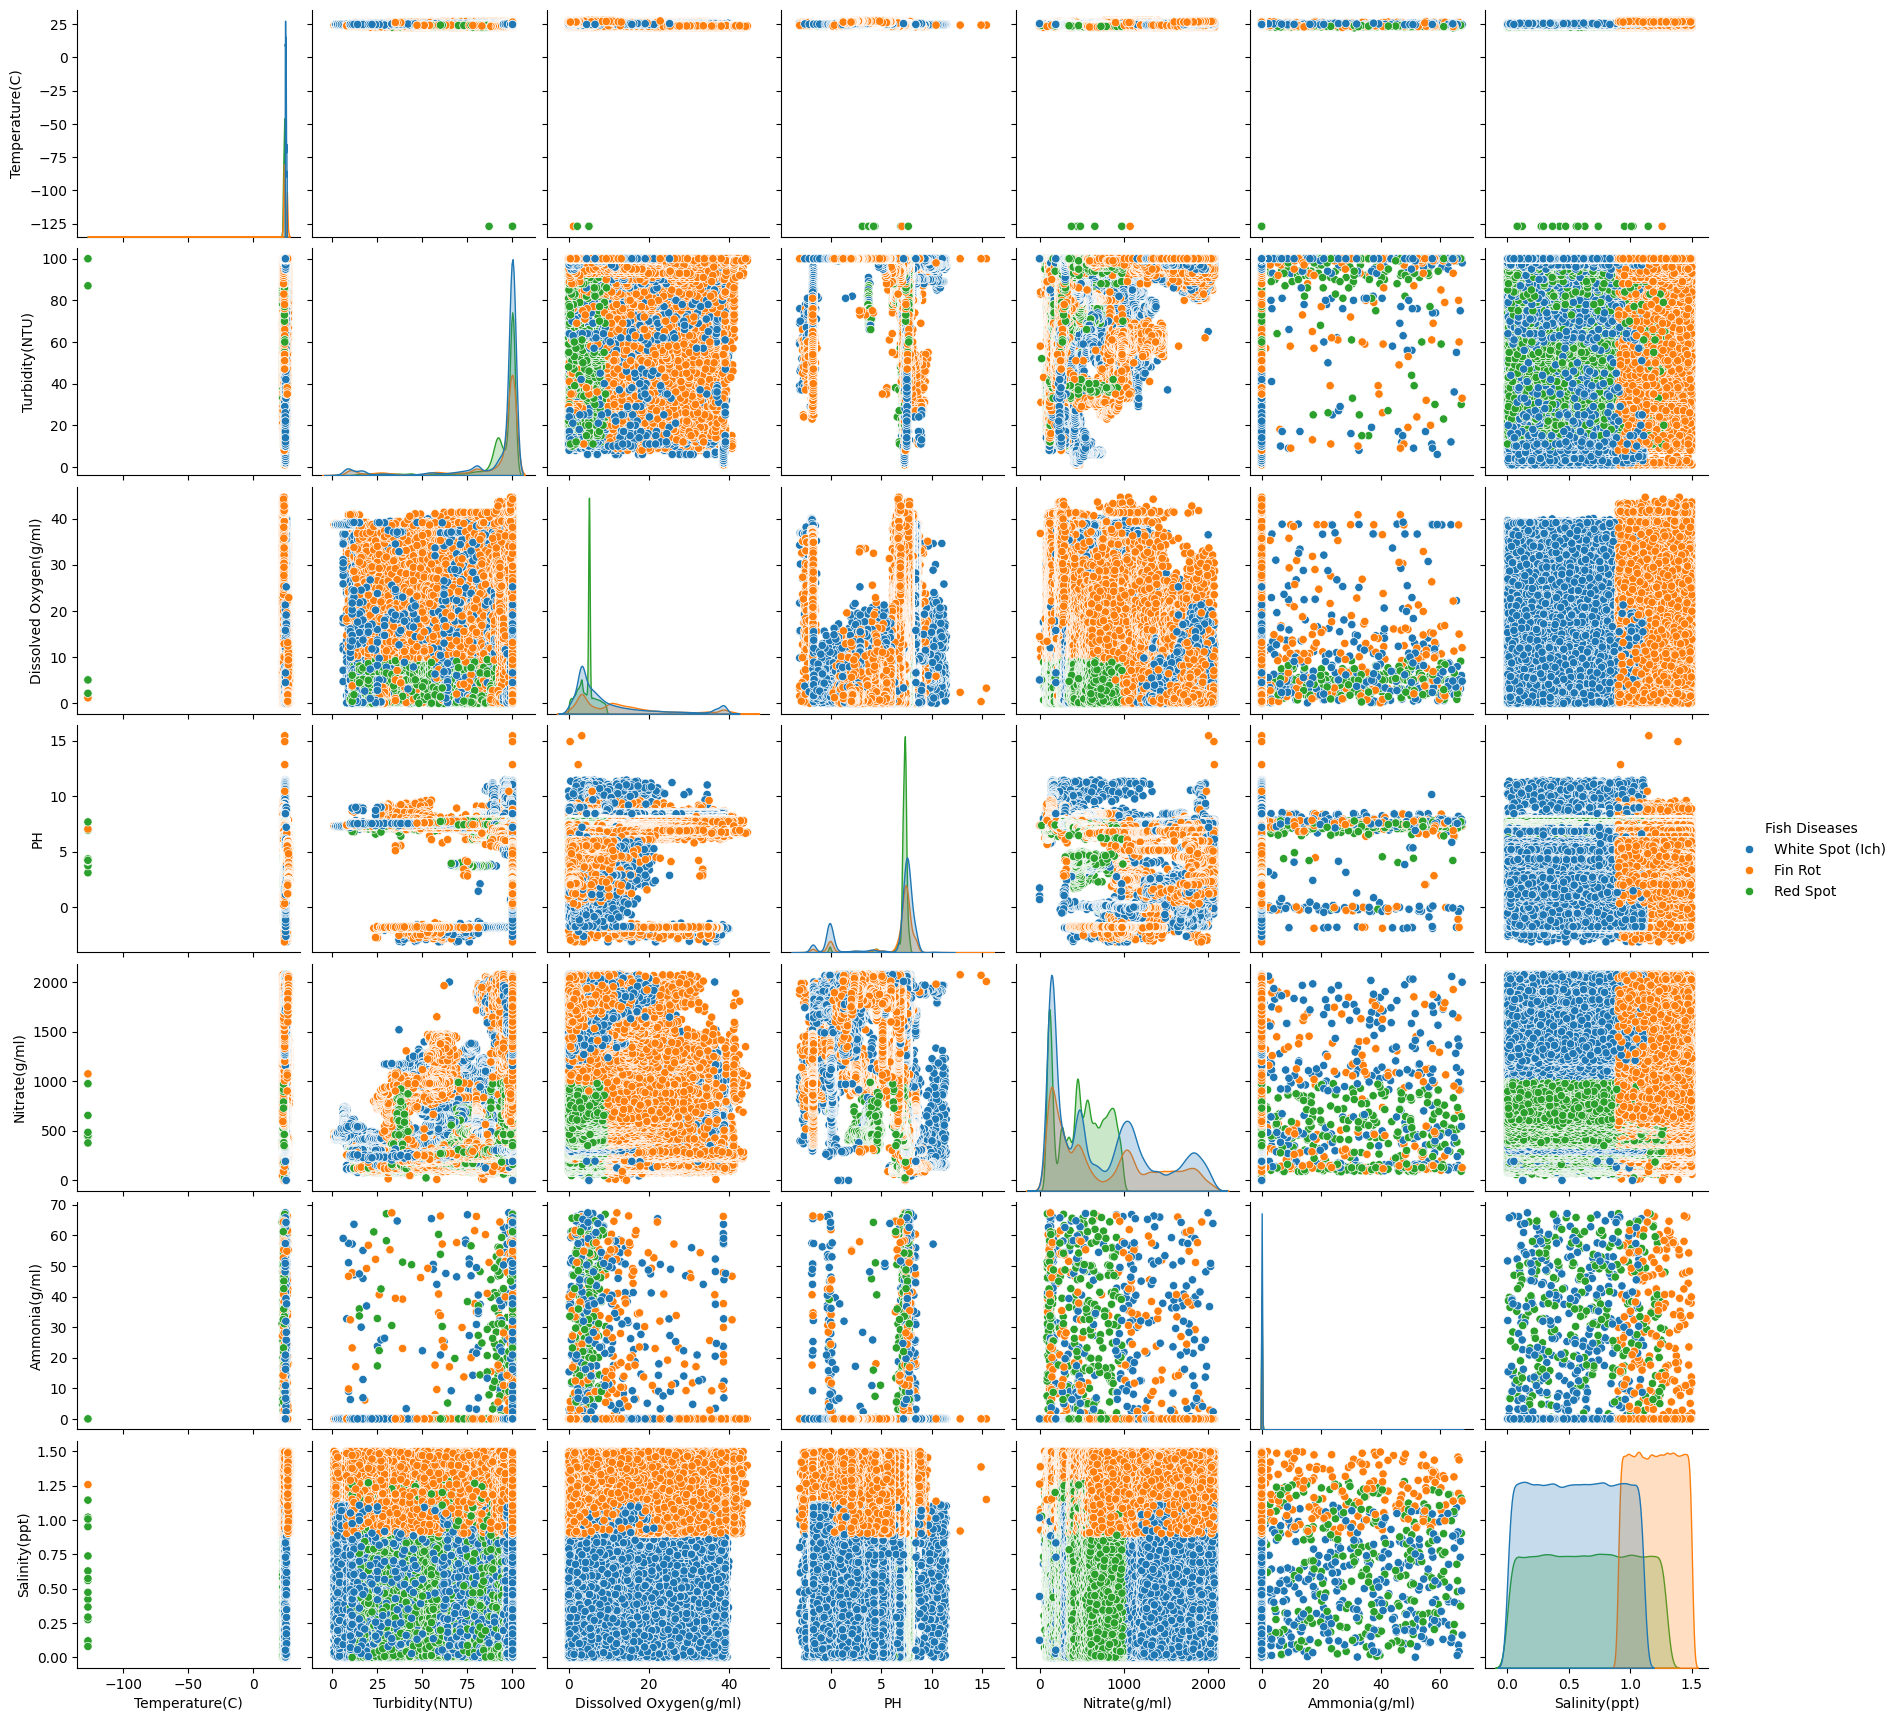

In [ ]:
#grid of scatterplots (pairwise plots) that visualize the relationships between multiple variables in a dataset
sns.pairplot(data,hue='Fish Diseases')

# **Feature Selection Phase 2 : Data-Driven Feature Selection:**

*Correlation*-based

*Identify and keep features that are most correlated with the target variable.*

<ipython-input-72-b53213ddee73>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


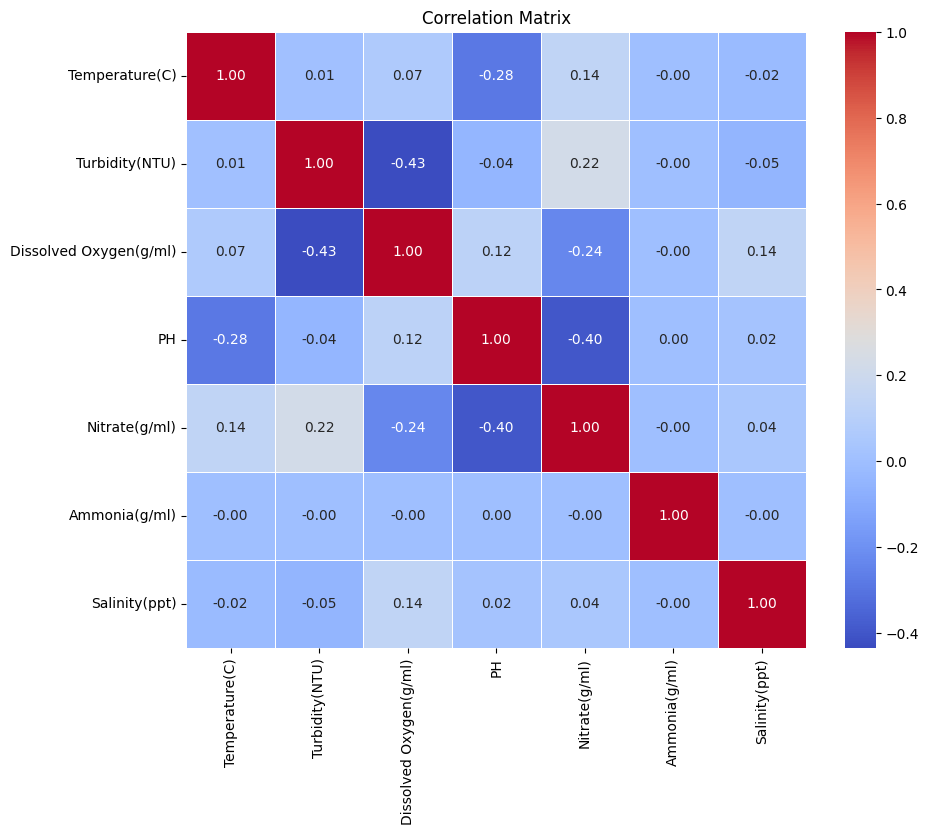

In [ ]:
# Assuming 'Fish Diseases' is your target variable
target_variable = 'Fish Diseases'

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

*Variance*

Remove features with low variance as they may not contain much information.

In [ ]:
# Assuming your target variable column is labeled 'Fish Diseases'
target_variable = 'Fish Diseases'

# Calculate variance for each feature with respect to the target variable
variance_by_target = data.groupby(target_variable).var()

# Display variances for each feature
print("Variance by Target Variable:")
print(variance_by_target)

Variance by Target Variable:
                  Temperature(C)  Turbidity(NTU)  Dissolved Oxygen(g/ml)  \
Fish Diseases                                                              
Fin Rot                 1.417918      604.906938              119.881191   
Red Spot                2.321121      262.450072                4.138825   
White Spot (Ich)        0.152907      506.640459              112.231869   

                         PH  Nitrate(g/ml)  Ammonia(g/ml)  Salinity(ppt)  
Fish Diseases                                                             
Fin Rot            7.504802  356206.876731       1.489473       0.030026  
Red Spot           1.131738   75272.287443       1.905172       0.139602  
White Spot (Ich)  11.425887  354630.714489       1.706456       0.102791  


*Mutual Information*

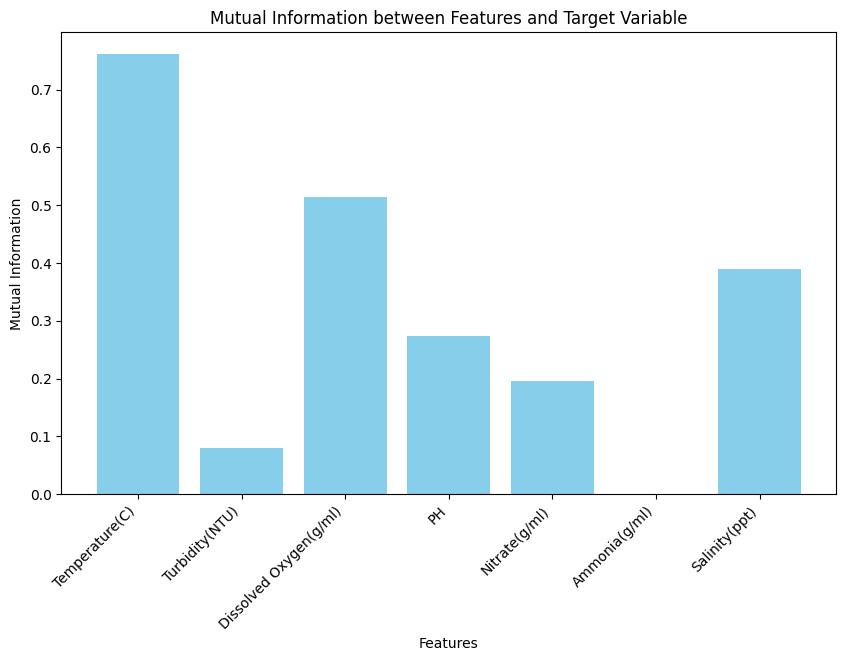

In [ ]:
# Assuming your target variable column is labeled 'Fish Diseases'
target_variable = 'Fish Diseases'

# Separate features and target variable
X1 = data.drop(target_variable, axis=1)
y1 = data[target_variable]

from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information for each feature
mutual_info_values = mutual_info_classif(X1, y1, discrete_features='auto', random_state=42)

# Create a bar plot to visualize mutual information values
plt.figure(figsize=(10, 6))
plt.bar(X1.columns, mutual_info_values, color='skyblue')
plt.title('Mutual Information between Features and Target Variable')
plt.xlabel('Features')
plt.ylabel('Mutual Information')
plt.xticks(rotation=45, ha='right')
plt.show()

**Mutual information measures how much knowing the value of one variable (e.g., a features) informs about the other (e.g., the target variable-Fish Diseases). In the code provided, the bar plot visually represents the mutual information between each feature and the target variable, helping identify which features are more informative for predicting the target.**

# One - Hot Encording

In [ ]:
# Perform one-hot encoding without dropping any columns
data_encoded = pd.get_dummies(data, columns=['Fish Diseases'])

# Display the updated DataFrame
print(data_encoded.sample(23))

# Save the one-hot encoded target variable into Y
Y = data_encoded[['Fish Diseases_Fin Rot', 'Fish Diseases_Red Spot', 'Fish Diseases_White Spot (Ich)']]

# Display the updated DataFrame
print(Y.sample())

        Temperature(C)  Turbidity(NTU)  Dissolved Oxygen(g/ml)       PH  \
201704         25.1875           100.0                   3.200 -0.23673   
451633         24.8750           100.0                  26.878  7.71641   
248779         25.5625            51.0                  36.500 -1.79377   
586499         25.9375           100.0                   6.872  4.39352   
573340         23.8125           100.0                   1.910  6.75858   
436754         24.6250            97.0                   2.290  8.11588   
272586         23.5625           100.0                   4.802  7.30332   
168402         23.8125            91.0                   3.945  7.09904   
389336         22.9375           100.0                   1.085  7.37595   
409125         23.1250           100.0                   5.080  7.18075   
62117          24.1875            91.0                   6.761  7.14444   
43694          25.0000            34.0                   1.353  7.28970   
64138          24.3750   

**One-hot encoding is commonly used for multiclass classification because it effectively represents categorical variables with multiple classes in a binary format suitable for machine learning algorithms. In multiclass classification, each instance can belong to one and only one class. One-hot encoding achieves this by creating binary columns, where each column corresponds to a unique class, and the presence of a class for an instance is indicated by a binary value (1) while the absence is represented by (0). This format allows machine learning models to interpret and learn from categorical data efficiently, facilitating accurate predictions and generalization to unseen data.**

# Feature Scaling

In [ ]:
x = data.drop('Fish Diseases',axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled= scaler.fit_transform(x)

In [ ]:
# Display the first three rows
(x_scaled[:3])

array([[ 0.33063806,  0.45640923, -0.5019793 ,  0.78723702, -0.91214559,
        -0.03247085,  0.15453216],
       [ 0.38235659,  0.45640923, -0.28457106,  0.78888267, -0.91026886,
        -0.02717634, -0.05732734],
       [ 0.33063806,  0.45640923,  0.66928683,  0.78393846, -0.91402232,
        -0.02891925,  0.27140436]])

In [ ]:
#'Fish Diseases' is the target variable
target_variable = data['Fish Diseases']

# Create a DataFrame with standardized features and the target variable
table_data = pd.concat([pd.DataFrame(x_scaled, columns=x.columns), target_variable], axis=1)

table_data.head()

Temperature(C)  Turbidity(NTU)  Dissolved Oxygen(g/ml)        PH  \
0        0.330638        0.456409               -0.501979  0.787237   
1        0.382357        0.456409               -0.284571  0.788883   
2        0.330638        0.456409                0.669287  0.783938   
3        0.382357        0.456409               -0.445864  0.787237   
4        0.382357        0.456409                3.014516  0.777341   

   Nitrate(g/ml)  Ammonia(g/ml)  Salinity(ppt)     Fish Diseases  
0      -0.912146      -0.032471       0.154532  White Spot (Ich)  
1      -0.910269      -0.027176      -0.057327  White Spot (Ich)  
2      -0.914022      -0.028919       0.271404  White Spot (Ich)  
3      -0.912146      -0.031973       0.763217  White Spot (Ich)  
4      -0.914022      -0.030032       0.354844  White Spot (Ich)

**In deep learning, scaling is crucial for numerical stability, faster convergence, and improved generalization. Normalized features prevent numerical instability in optimization algorithms, facilitate faster convergence by avoiding dominance of certain dimensions, and enhance model generalization by focusing on underlying patterns. Scaling is essential to avoid vanishing/exploding gradients in deep architectures, ensuring stable and effective training. Popular scaling techniques include Min-Max scaling, Z-score normalization, and robust scaling.**

# **Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, test_size=0.30,random_state=42)

In [ ]:
x_train.shape

(416021, 7)

In [ ]:
y_train.shape

(416021, 3)

In [ ]:
x_train

array([[-1.53122896,  0.45640923, -0.44233725, ...,  0.22890411,
        -0.0302355 , -1.14974093],
       [-0.34170281,  0.13089365, -0.19785671, ..., -0.82018599,
        -0.02929893, -1.2371809 ],
       [ 0.17548247,  0.45640923, -0.469617  , ..., -1.03788626,
        -0.02765684, -1.68663752],
       ...,
       [-0.44513987,  0.45640923, -0.49150304, ..., -0.35663455,
        -0.02781297, -1.11725852],
       [ 0.12376394,  0.45640923, -0.65196609, ..., -0.46360796,
        -0.02722637, -0.40322018],
       [-0.08311017,  0.45640923, -0.67820859, ..., -0.93654303,
        -0.03137481,  0.90733603]])

In [ ]:
y_train

Fish Diseases_Fin Rot  Fish Diseases_Red Spot  \
396288                      0                       1   
539755                      0                       1   
21331                       0                       0   
468320                      1                       0   
192480                      0                       1   
...                       ...                     ...   
111049                      0                       0   
260997                      1                       0   
368404                      0                       1   
132889                      0                       0   
122832                      0                       1   

        Fish Diseases_White Spot (Ich)  
396288                               0  
539755                               0  
21331                                1  
468320                               0  
192480                               0  
...                                ...  
111049                               1  
260997                               0  
368404                               0  
132889                               1  
122832                               0  

[416021 rows x 3 columns]

# **Building the Neural Network**

# **Model_Architecture_1**

# **Model_1**

**Setting up the layers of Neural Network**

In [ ]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(7,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

**compile the model**

In [ ]:
model1.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

**Train the Model**

In [ ]:
epoch_number = 20
history = model1.fit(x_train, y_train, epochs=epoch_number,batch_size=256)

Epoch 1/20
1626/1626 [==============================] - 9s 5ms/step - loss: 0.3364 - accuracy: 0.8801
Epoch 2/20
1626/1626 [==============================] - 6s 4ms/step - loss: 0.1385 - accuracy: 0.9619
Epoch 3/20
1626/1626 [==============================] - 7s 5ms/step - loss: 0.0968 - accuracy: 0.9759
Epoch 4/20
1626/1626 [==============================] - 6s 4ms/step - loss: 0.0853 - accuracy: 0.9815
Epoch 5/20
1626/1626 [==============================] - 8s 5ms/step - loss: 0.0787 - accuracy: 0.9836
Epoch 6/20
1626/1626 [==============================] - 7s 5ms/step - loss: 0.0801 - accuracy: 0.9851
Epoch 7/20
1626/1626 [==============================] - 9s 6ms/step - loss: 0.0828 - accuracy: 0.9858
Epoch 8/20
1626/1626 [==============================] - 7s 4ms/step - loss: 0.0758 - accuracy: 0.9862
Epoch 9/20
1626/1626 [==============================] - 13s 8ms/step - loss: 0.0776 - accuracy: 0.9867
Epoch 10/20
1626/1626 [==============================] - 8s 5ms/step - loss: 0.08

# **Evaluate Model**

In [ ]:
model1.evaluate(x_test,y_test)

5572/5572 [==============================] - 15s 3ms/step - loss: 0.0309 - accuracy: 0.9967


[0.030934499576687813, 0.9966740608215332]

# **Model Summary**

In [ ]:
#summary of the neural network model
model1.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 128)               1024      
                                                                 
 dropout_24 (Dropout)        (None, 128)               0         
                                                                 
 dense_63 (Dense)            (None, 64)                8256      
                                                                 
 dropout_25 (Dropout)        (None, 64)                0         
                                                                 
 dense_64 (Dense)            (None, 32)                2080      
                                                                 
 dropout_26 (Dropout)        (None, 32)                0         
                                                                 
 dense_65 (Dense)            (None, 16)              

In [ ]:
y_pred = model1.predict(x_test)
y_pred[:5]

5572/5572 [==============================] - 11s 2ms/step


array([[1.9282722e-14, 1.9460892e-36, 1.0000000e+00],
       [2.1191132e-11, 1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 9.2268561e-15, 1.5865867e-17],
       [9.9994850e-01, 5.0623137e-05, 8.2644681e-07],
       [1.0000000e+00, 8.6848679e-09, 4.6939314e-11]], dtype=float32)

In [ ]:
y_test[:5]

Fish Diseases_Fin Rot  Fish Diseases_Red Spot  \
132937                      0                       0   
406224                      0                       1   
576145                      1                       0   
518777                      1                       0   
108553                      1                       0   

        Fish Diseases_White Spot (Ich)  
132937                               1  
406224                               0  
576145                               0  
518777                               0  
108553                               0

In [ ]:
x_test[:5]

array([[ 0.07204542,  0.45640923, -0.47314366,  0.4079456 , -0.51990976,
        -0.03199189, -1.59345907],
       [-1.16919927,  0.45640923, -0.44233725,  0.34033227,  0.1500816 ,
        -0.02930846,  1.13765963],
       [-0.54857693,  0.27040033,  0.81315382,  0.21500132,  1.69838094,
        -0.02802458,  0.3847123 ],
       [ 1.26157157,  0.45640923,  0.37263246,  0.32713801, -0.70945913,
        -0.02988478,  0.95600449],
       [ 1.20985304,  0.45640923,  0.78950445,  0.5448179 , -0.99847501,
        -0.03005907,  1.6040166 ]])

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred[:5]

array([2, 1, 0, 0, 0])

# **Precision**

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_true_one_hot = label_binarizer.fit_transform(y_test)

# Convert the one-hot encoded true labels to class labels
y_true_classes = tf.argmax(y_true_one_hot, axis=1)

# Precision
precision = tf.keras.metrics.Precision()
precision.update_state(y_true_classes, y_pred)
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.99794686>

# **Recall**

In [ ]:
# Recall
recall = tf.keras.metrics.Recall()
recall.update_state(y_true_classes, y_pred)
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.9975112>

# **Training Accuracy and Loss Over Epochs:**

<Axes: >

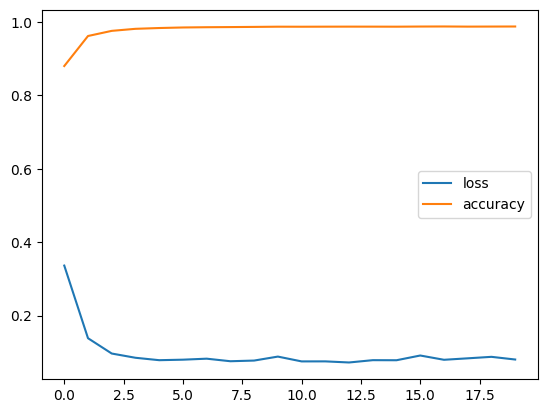

In [ ]:
pd.DataFrame(history.history).plot()

# **Model_2**

**Setting up the layers of Neural Network**

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(7,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

**compile the model**

In [ ]:
model2.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=['accuracy']
)


**Train the Model**

In [ ]:
epoch_number = 15
history = model2.fit(x_train, y_train, epochs=epoch_number,batch_size=256)

Epoch 1/15
1626/1626 [==============================] - 10s 5ms/step - loss: 0.9250 - accuracy: 0.5469
Epoch 2/15
1626/1626 [==============================] - 7s 5ms/step - loss: 0.6392 - accuracy: 0.7604
Epoch 3/15
1626/1626 [==============================] - 9s 6ms/step - loss: 0.4956 - accuracy: 0.8283
Epoch 4/15
1626/1626 [==============================] - 8s 5ms/step - loss: 0.4073 - accuracy: 0.8664
Epoch 5/15
1626/1626 [==============================] - 8s 5ms/step - loss: 0.3409 - accuracy: 0.8926
Epoch 6/15
1626/1626 [==============================] - 7s 4ms/step - loss: 0.2903 - accuracy: 0.9098
Epoch 7/15
1626/1626 [==============================] - 7s 5ms/step - loss: 0.2545 - accuracy: 0.9225
Epoch 8/15
1626/1626 [==============================] - 6s 4ms/step - loss: 0.2302 - accuracy: 0.9302
Epoch 9/15
1626/1626 [==============================] - 7s 5ms/step - loss: 0.2098 - accuracy: 0.9368
Epoch 10/15
1626/1626 [==============================] - 9s 6ms/step - loss: 0.19

# **Evaluate Model**

In [ ]:
model2.evaluate(x_test,y_test)

5572/5572 [==============================] - 15s 3ms/step - loss: 0.0456 - accuracy: 0.9890


[0.04557088017463684, 0.9889733791351318]

# **Model Summary**

In [ ]:
#summary of the neural network model
model2.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 128)               1024      
                                                                 
 dropout_28 (Dropout)        (None, 128)               0         
                                                                 
 dense_68 (Dense)            (None, 64)                8256      
                                                                 
 dropout_29 (Dropout)        (None, 64)                0         
                                                                 
 dense_69 (Dense)            (None, 32)                2080      
                                                                 
 dropout_30 (Dropout)        (None, 32)                0         
                                                                 
 dense_70 (Dense)            (None, 16)              

In [ ]:
y_pred = model2.predict(x_test)
y_pred[:5]

5572/5572 [==============================] - 10s 2ms/step


array([[1.7625774e-04, 2.6145822e-08, 9.9982375e-01],
       [2.9832160e-02, 9.5805949e-01, 1.2108385e-02],
       [9.9875450e-01, 6.7532392e-07, 1.2448247e-03],
       [9.9937707e-01, 4.9314463e-07, 6.2249840e-04],
       [9.9999821e-01, 8.8198810e-14, 1.7679629e-06]], dtype=float32)

In [ ]:
y_test[:5]

Fish Diseases_Fin Rot  Fish Diseases_Red Spot  \
132937                      0                       0   
406224                      0                       1   
576145                      1                       0   
518777                      1                       0   
108553                      1                       0   

        Fish Diseases_White Spot (Ich)  
132937                               1  
406224                               0  
576145                               0  
518777                               0  
108553                               0

In [ ]:
x_test[:5]

array([[ 0.07204542,  0.45640923, -0.47314366,  0.4079456 , -0.51990976,
        -0.03199189, -1.59345907],
       [-1.16919927,  0.45640923, -0.44233725,  0.34033227,  0.1500816 ,
        -0.02930846,  1.13765963],
       [-0.54857693,  0.27040033,  0.81315382,  0.21500132,  1.69838094,
        -0.02802458,  0.3847123 ],
       [ 1.26157157,  0.45640923,  0.37263246,  0.32713801, -0.70945913,
        -0.02988478,  0.95600449],
       [ 1.20985304,  0.45640923,  0.78950445,  0.5448179 , -0.99847501,
        -0.03005907,  1.6040166 ]])

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred[:5]

array([2, 1, 0, 0, 0])

# **Precision**

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_true_one_hot = label_binarizer.fit_transform(y_test)

# Convert the one-hot encoded true labels to class labels
y_true_classes = tf.argmax(y_true_one_hot, axis=1)

# Precision
precision = tf.keras.metrics.Precision()
precision.update_state(y_true_classes, y_pred)
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.99310035>

# **Recall**

In [ ]:
# Recall
recall = tf.keras.metrics.Recall()
recall.update_state(y_true_classes, y_pred)
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.9930927>

# **Training Accuracy and Loss Over Epochs:**

<Axes: >

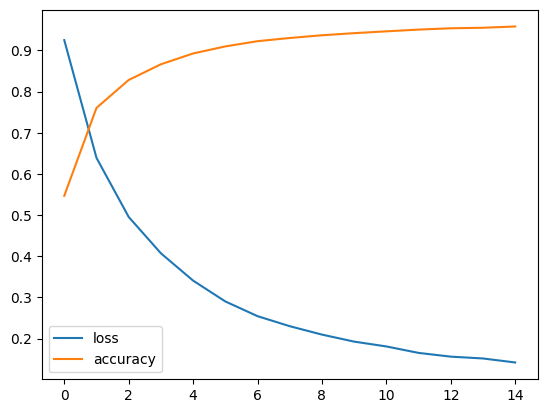

In [ ]:
pd.DataFrame(history.history).plot()

# **Model_3**

**Setting up the layers of Neural Network**

In [ ]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(7,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
  ])

**compile the model**

In [ ]:
model3.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
  )

**Train the Model**

In [ ]:
epoch_number = 15
history = model3.fit(x_train, y_train, epochs=epoch_number,batch_size=128)

Epoch 1/15
3251/3251 [==============================] - 16s 4ms/step - loss: 0.2951 - accuracy: 0.9000
Epoch 2/15
3251/3251 [==============================] - 14s 4ms/step - loss: 0.1161 - accuracy: 0.9690
Epoch 3/15
3251/3251 [==============================] - 14s 4ms/step - loss: 0.0854 - accuracy: 0.9765
Epoch 4/15
3251/3251 [==============================] - 14s 4ms/step - loss: 0.0758 - accuracy: 0.9789
Epoch 5/15
3251/3251 [==============================] - 18s 5ms/step - loss: 0.0663 - accuracy: 0.9805
Epoch 6/15
3251/3251 [==============================] - 18s 6ms/step - loss: 0.0636 - accuracy: 0.9819
Epoch 7/15
3251/3251 [==============================] - 20s 6ms/step - loss: 0.0617 - accuracy: 0.9823
Epoch 8/15
3251/3251 [==============================] - 14s 4ms/step - loss: 0.0566 - accuracy: 0.9828
Epoch 9/15
3251/3251 [==============================] - 14s 4ms/step - loss: 0.0575 - accuracy: 0.9828
Epoch 10/15
3251/3251 [==============================] - 14s 4ms/step - l

# **Evaluate Model**

In [ ]:
model3.evaluate(x_test,y_test)

5572/5572 [==============================] - 16s 3ms/step - loss: 0.0148 - accuracy: 0.9953


[0.014784570783376694, 0.9953336119651794]

# **Model Summary**

In [ ]:
model3.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 128)               1024      
                                                                 
 dropout_32 (Dropout)        (None, 128)               0         
                                                                 
 dense_73 (Dense)            (None, 64)                8256      
                                                                 
 dropout_33 (Dropout)        (None, 64)                0         
                                                                 
 dense_74 (Dense)            (None, 32)                2080      
                                                                 
 dropout_34 (Dropout)        (None, 32)                0         
                                                                 
 dense_75 (Dense)            (None, 16)              

In [ ]:
y_pred = model3.predict(x_test)
y_pred[:5]

5572/5572 [==============================] - 14s 3ms/step


array([[9.7551080e-13, 3.6238647e-29, 1.0000000e+00],
       [2.5543390e-08, 1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.0367888e-09, 0.0000000e+00],
       [9.9998641e-01, 1.3607629e-05, 8.0974939e-22],
       [1.0000000e+00, 6.1869880e-12, 0.0000000e+00]], dtype=float32)

In [ ]:
y_test[:5]

Fish Diseases_Fin Rot  Fish Diseases_Red Spot  \
132937                      0                       0   
406224                      0                       1   
576145                      1                       0   
518777                      1                       0   
108553                      1                       0   

        Fish Diseases_White Spot (Ich)  
132937                               1  
406224                               0  
576145                               0  
518777                               0  
108553                               0

In [ ]:
x_test[:5]

array([[ 0.07204542,  0.45640923, -0.47314366,  0.4079456 , -0.51990976,
        -0.03199189, -1.59345907],
       [-1.16919927,  0.45640923, -0.44233725,  0.34033227,  0.1500816 ,
        -0.02930846,  1.13765963],
       [-0.54857693,  0.27040033,  0.81315382,  0.21500132,  1.69838094,
        -0.02802458,  0.3847123 ],
       [ 1.26157157,  0.45640923,  0.37263246,  0.32713801, -0.70945913,
        -0.02988478,  0.95600449],
       [ 1.20985304,  0.45640923,  0.78950445,  0.5448179 , -0.99847501,
        -0.03005907,  1.6040166 ]])

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred[:5]

array([2, 1, 0, 0, 0])


# **Precision**

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_true_one_hot = label_binarizer.fit_transform(y_test)

# Convert the one-hot encoded true labels to class labels
y_true_classes = tf.argmax(y_true_one_hot, axis=1)

# Precision
precision = tf.keras.metrics.Precision()
precision.update_state(y_true_classes, y_pred)
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.9990466>

# **Recall**

In [ ]:
# Recall
recall = tf.keras.metrics.Recall()
recall.update_state(y_true_classes, y_pred)
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.99506074>

# **Training Accuracy and Loss Over Epochs:**

<Axes: >

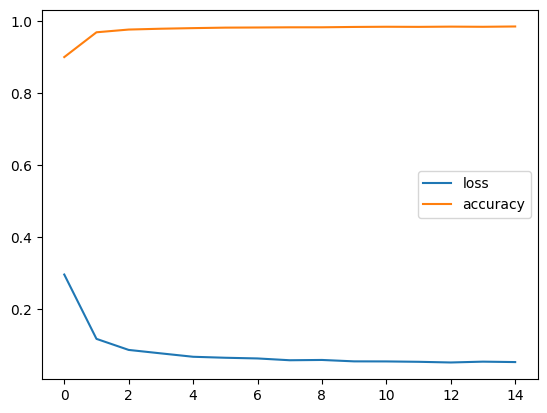

In [ ]:
pd.DataFrame(history.history).plot()

# **Model_Architecture_2**

# **Model_4**

**Setting up the layers of Neural Network**

In [ ]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(7,)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax')
])

**compile the model**

In [ ]:
model4.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
  )

**Train the Model**

In [ ]:
epoch_number = 10
history = model4.fit(x_train, y_train, epochs=epoch_number,batch_size=64)

Epoch 1/10
6501/6501 [==============================] - 36s 5ms/step - loss: 0.1671 - accuracy: 0.9437
Epoch 2/10
6501/6501 [==============================] - 33s 5ms/step - loss: 0.0731 - accuracy: 0.9749
Epoch 3/10
6501/6501 [==============================] - 36s 6ms/step - loss: 0.0641 - accuracy: 0.9773
Epoch 4/10
6501/6501 [==============================] - 32s 5ms/step - loss: 0.0606 - accuracy: 0.9785
Epoch 5/10
6501/6501 [==============================] - 34s 5ms/step - loss: 0.0568 - accuracy: 0.9788
Epoch 6/10
6501/6501 [==============================] - 34s 5ms/step - loss: 0.0561 - accuracy: 0.9798
Epoch 7/10
6501/6501 [==============================] - 32s 5ms/step - loss: 0.0577 - accuracy: 0.9787
Epoch 8/10
6501/6501 [==============================] - 35s 5ms/step - loss: 0.0501 - accuracy: 0.9804
Epoch 9/10
6501/6501 [==============================] - 33s 5ms/step - loss: 0.0525 - accuracy: 0.9801
Epoch 10/10
6501/6501 [==============================] - 32s 5ms/step - l

# **Evaluate Model**

In [ ]:
model4.evaluate(x_test,y_test)

5572/5572 [==============================] - 16s 3ms/step - loss: 0.0155 - accuracy: 0.9930


[0.015489117242395878, 0.9930003881454468]

In [ ]:
#summary of the neural network model
model4.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_91 (Dense)            (None, 256)               2048      
                                                                 
 dropout_48 (Dropout)        (None, 256)               0         
                                                                 
 dense_92 (Dense)            (None, 128)               32896     
                                                                 
 dropout_49 (Dropout)        (None, 128)               0         
                                                                 
 dense_93 (Dense)            (None, 64)                8256      
                                                                 
 dropout_50 (Dropout)        (None, 64)                0         
                                                                 
 dense_94 (Dense)            (None, 32)              

In [ ]:
y_pred = model4.predict(x_test)
y_pred[:5]

5572/5572 [==============================] - 12s 2ms/step


array([[6.9227246e-10, 0.0000000e+00, 1.0000000e+00],
       [1.7140377e-06, 9.9999833e-01, 0.0000000e+00],
       [1.0000000e+00, 1.4040128e-19, 5.4204777e-18],
       [6.9706577e-01, 4.5480739e-02, 2.5745350e-01],
       [9.9999988e-01, 5.7490355e-09, 8.4032287e-08]], dtype=float32)

In [ ]:
y_test[:5]

Fish Diseases_Fin Rot  Fish Diseases_Red Spot  \
132937                      0                       0   
406224                      0                       1   
576145                      1                       0   
518777                      1                       0   
108553                      1                       0   

        Fish Diseases_White Spot (Ich)  
132937                               1  
406224                               0  
576145                               0  
518777                               0  
108553                               0

In [ ]:
x_test[:5]

array([[ 0.07204542,  0.45640923, -0.47314366,  0.4079456 , -0.51990976,
        -0.03199189, -1.59345907],
       [-1.16919927,  0.45640923, -0.44233725,  0.34033227,  0.1500816 ,
        -0.02930846,  1.13765963],
       [-0.54857693,  0.27040033,  0.81315382,  0.21500132,  1.69838094,
        -0.02802458,  0.3847123 ],
       [ 1.26157157,  0.45640923,  0.37263246,  0.32713801, -0.70945913,
        -0.02988478,  0.95600449],
       [ 1.20985304,  0.45640923,  0.78950445,  0.5448179 , -0.99847501,
        -0.03005907,  1.6040166 ]])

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred[:5]

array([2, 1, 0, 0, 0])

# **Precision**

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_true_one_hot = label_binarizer.fit_transform(y_test)

# Convert the one-hot encoded true labels to class labels
y_true_classes = tf.argmax(y_true_one_hot, axis=1)

# Precision
precision = tf.keras.metrics.Precision()
precision.update_state(y_true_classes, y_pred)
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.9950652>

# **Recall**

In [ ]:
recall = tf.keras.metrics.Recall()
recall.update_state(y_true_classes, y_pred)
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.99596435>

# Save model using SavedModel format

In [ ]:
model.save("new_model_")

In [ ]:
# Save the fitted scaler to a file
joblib.dump(scaler, 'scaler_filename.joblib')

['scaler_filename.joblib']

## **Using SavedModel format**

In [ ]:
data.head()

Temperature(C)  Turbidity(NTU)  Dissolved Oxygen(g/ml)       PH  \
0         24.8750           100.0                   4.505  8.43365   
1         24.9375           100.0                   6.601  8.43818   
2         24.8750           100.0                  15.797  8.42457   
3         24.9375           100.0                   5.046  8.43365   
4         24.9375           100.0                  38.407  8.40641   

   Nitrate(g/ml)  Ammonia(g/ml)     Fish Diseases  Salinity(ppt)  
0          193.0       0.021316  White Spot (Ich)       0.819644  
1          194.0       0.028238  White Spot (Ich)       0.732725  
2          192.0       0.025959  White Spot (Ich)       0.867593  
3          193.0       0.021967  White Spot (Ich)       1.069370  
4          192.0       0.024505  White Spot (Ich)       0.901826

In [ ]:
import joblib

In [ ]:
loaded_scaler = joblib.load('/content/drive/MyDrive/F4_Final/scaler_filename.joblib')

In [ ]:
new_data_point = np.array([[23.62,99.0,5.08,7.320,380,0.025689,1.01]])

In [ ]:
new_data_point_scaled = loaded_scaler.transform(new_data_point)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
new_data_point_scaled

array([[-0.70786999,  0.40990701, -0.44233725,  0.38267234, -0.56119774,
        -0.02912593,  0.61850823]])

# **Making a Predictive System**

In [ ]:
new_model_ = tf.keras.models.load_model('/content/drive/MyDrive/F4_Final/new_model_')
prediction = new_model_.predict(new_data_point_scaled)

# Convert predictions to percentage values with two decimal places
decimal_places = 7

# Make a prediction
prediction = new_model_.predict(new_data_point_scaled)

# Convert the predictions to percentage without rounding
percentage_values = np.round(prediction.flatten() * 100, 4)

# Format the percentage values without scientific notation
formatted_percentage_values = [f'{val:.4f}' for val in percentage_values]

print("Original Predictions:")
print(prediction)
print("\nPredictions in Percentage (formatted without scientific notation):")
print(formatted_percentage_values)

1/1 [==============================] - 0s 42ms/step
Original Predictions:
[[1.0083791e-01 8.9916211e-01 1.4749704e-12]]

Predictions in Percentage (formatted without scientific notation):
['10.0838', '89.9162', '0.0000']


In [ ]:
import numpy as np
import tensorflow as tf

# Assuming you have a dictionary that maps class indices to their labels
class_labels = {0: "Fin Rot", 1: "Red Spot", 2: "White Spot (Ich)"}

# Load the model
new_model_ = tf.keras.models.load_model('/content/drive/MyDrive/F4_Final/new_model_')

# Make a prediction
prediction = new_model_.predict(new_data_point_scaled)

# Convert the predictions to percentage without rounding
percentage_values = np.round(prediction.flatten() * 100, 4)

# Display predictions with class names
print("Predictions:")
for label, percentage in zip(class_labels.values(), percentage_values):
    print(f"{label}: {percentage:.4f}%")


1/1 [==============================] - 0s 77ms/step
Predictions:
Fin Rot: 10.0838%
Red Spot: 89.9162%
White Spot (Ich): 0.0000%
